## PROBLEM 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
xlsf=pd.ExcelFile("Election_Data.xlsx")
df=pd.read_excel(xlsf, 'Election_Dataset_Two Classes')

In [3]:
df

Unnamed: 0          vote  age  economic.cond.national  \
0              1        Labour   43                       3   
1              2        Labour   36                       4   
2              3        Labour   35                       4   
3              4        Labour   24                       4   
4              5        Labour   41                       2   
...          ...           ...  ...                     ...   
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
0                           3      4      1       2                    2   
1                           4      4      4       5                    2   
2                           4      5      2       3                    2   
3                           2      2      1       4                    0   
4                           2      1      1       6                    2   
...                       ...    ...    ...     ...                  ...   
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
0     female  
1       male  
2       male  
3     female  
4       male  
...      ...  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female  

[1525 rows x 10 columns]

In [4]:
df  = df.drop("Unnamed: 0", axis=True)

In [5]:
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2                    2  female  
1         4      4       5                    2    male  
2         5      2       3                    2    male  
3         2      1       4                    0  female  
4         1      1       6                    2    male  
...     ...    ...     ...                  ...     ...  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female  

[1525 rows x 9 columns]

# EDA on the given data

In [6]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.shape

(1525, 9)

In [9]:
df.describe(include='all')

vote          age  economic.cond.national  economic.cond.household  \
count     1525  1525.000000             1525.000000              1525.000000   
unique       2          NaN                     NaN                      NaN   
top     Labour          NaN                     NaN                      NaN   
freq      1063          NaN                     NaN                      NaN   
mean       NaN    54.182295                3.245902                 3.140328   
std        NaN    15.711209                0.880969                 0.929951   
min        NaN    24.000000                1.000000                 1.000000   
25%        NaN    41.000000                3.000000                 3.000000   
50%        NaN    53.000000                3.000000                 3.000000   
75%        NaN    67.000000                4.000000                 4.000000   
max        NaN    93.000000                5.000000                 5.000000   

              Blair        Hague       Europe  political.knowledge  gender  
count   1525.000000  1525.000000  1525.000000          1525.000000    1525  
unique          NaN          NaN          NaN                  NaN       2  
top             NaN          NaN          NaN                  NaN  female  
freq            NaN          NaN          NaN                  NaN     812  
mean       3.334426     2.746885     6.728525             1.542295     NaN  
std        1.174824     1.230703     3.297538             1.083315     NaN  
min        1.000000     1.000000     1.000000             0.000000     NaN  
25%        2.000000     2.000000     4.000000             0.000000     NaN  
50%        4.000000     2.000000     6.000000             2.000000     NaN  
75%        4.000000     4.000000    10.000000             2.000000     NaN  
max        5.000000     5.000000    11.000000             3.000000     NaN

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

# From the result of the data we can understand that the duplicate data that is seen within the given Dataframe is still unique in other attributes


In [11]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

<AxesSubplot:>

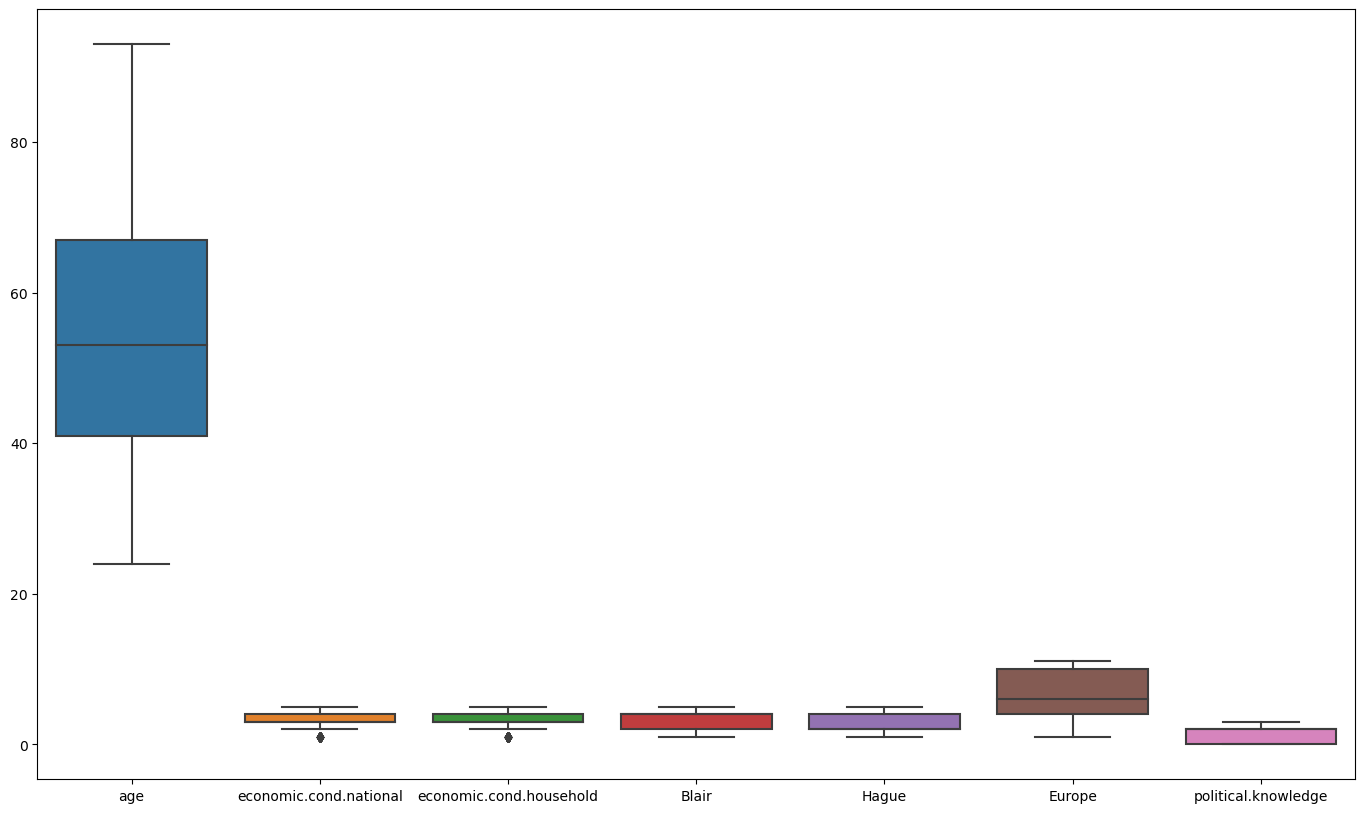

In [12]:
import seaborn as sns
from matplotlib.pyplot import figure
#sns.set_theme(style="whitegrid")
figure(figsize=(17,10))
sns.boxplot(data=df)

In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=(10,5))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='black');
    figure(figsize=(5,5))
    plt.show()
    
    plt.figure(figsize=(10,5))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column], color='r')
    plt.show()

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of age
----------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


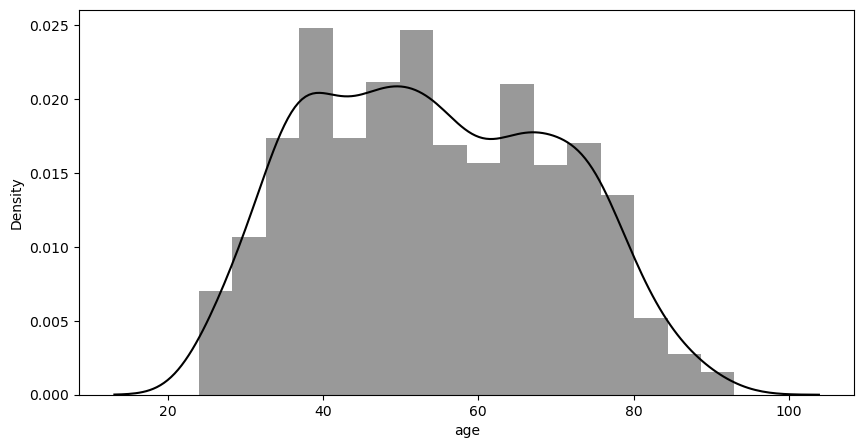

<Figure size 500x500 with 0 Axes>

BoxPlot of age
----------------------------------------------------------------------------


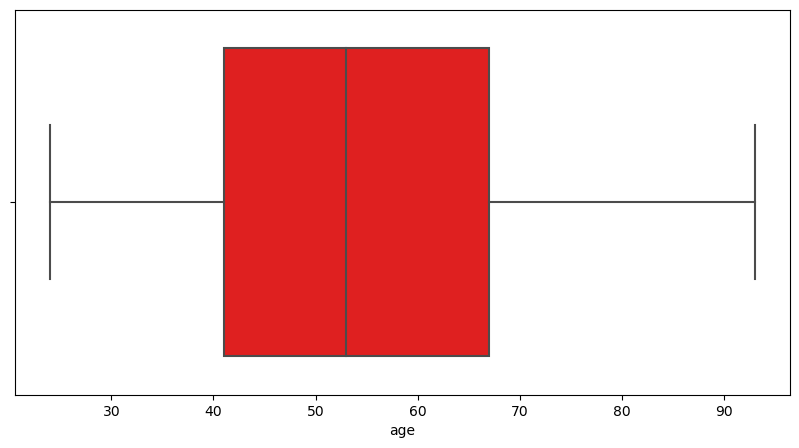

Description of economic.cond.national
----------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Distribution of economic.cond.national
----------------------------------------------------------------------------


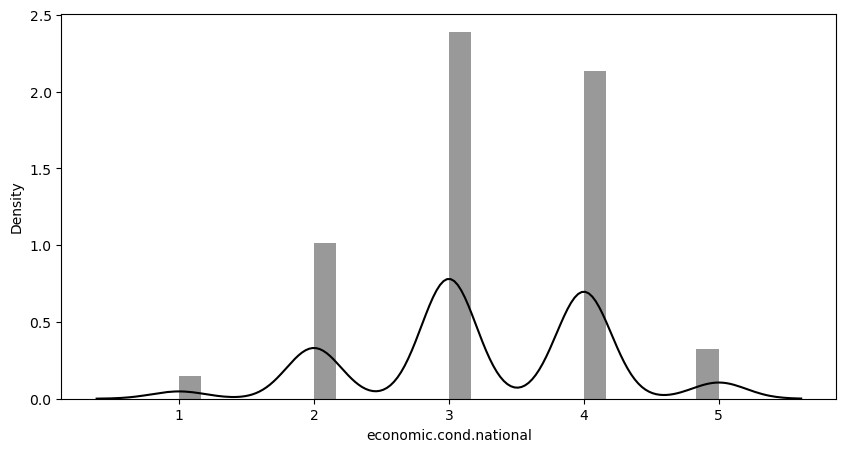

<Figure size 500x500 with 0 Axes>

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


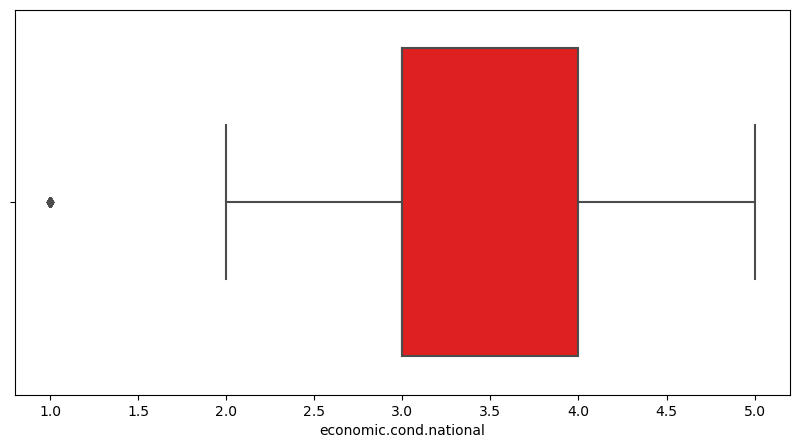

Description of economic.cond.household
----------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Distribution of economic.cond.household
----------------------------------------------------------------------------


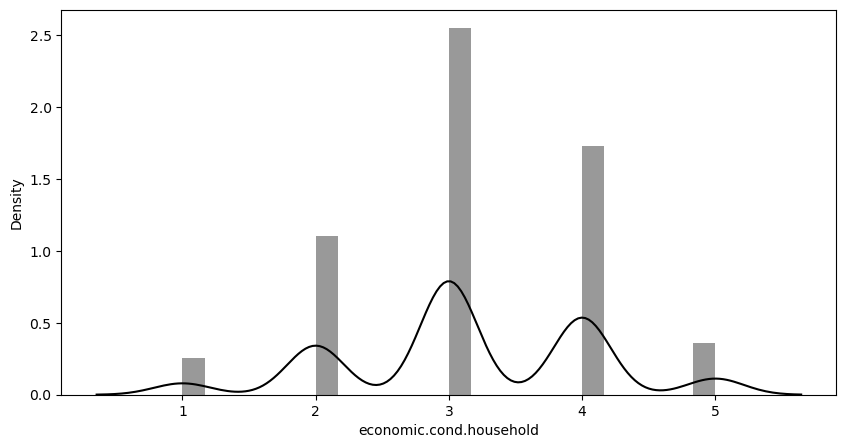

<Figure size 500x500 with 0 Axes>

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


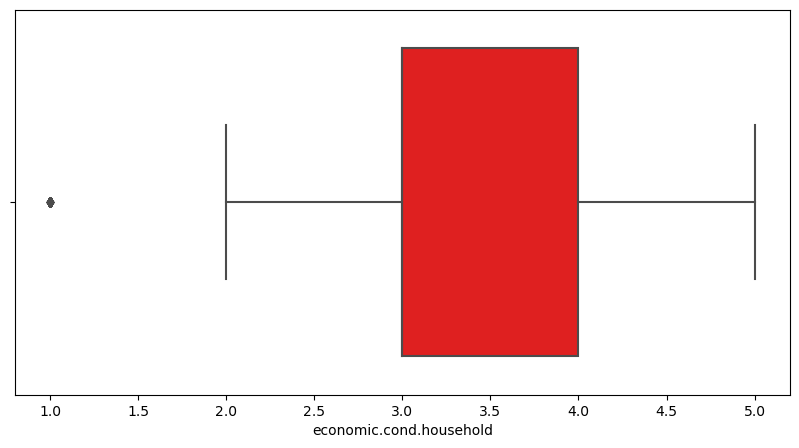

Description of Blair
----------------------------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


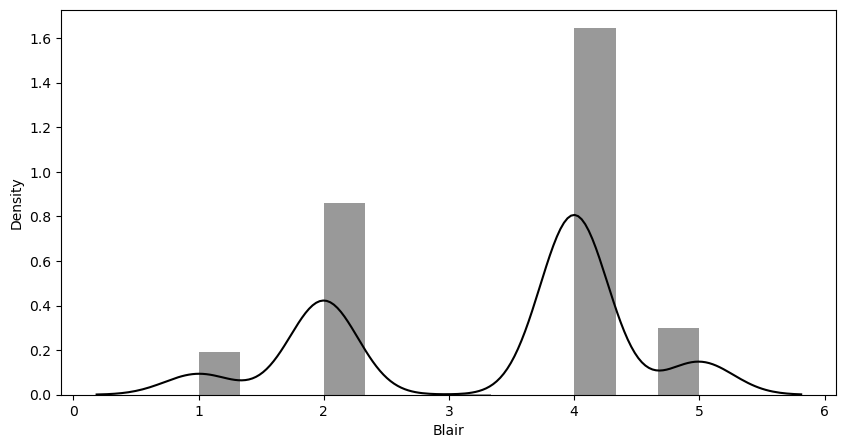

<Figure size 500x500 with 0 Axes>

BoxPlot of Blair
----------------------------------------------------------------------------


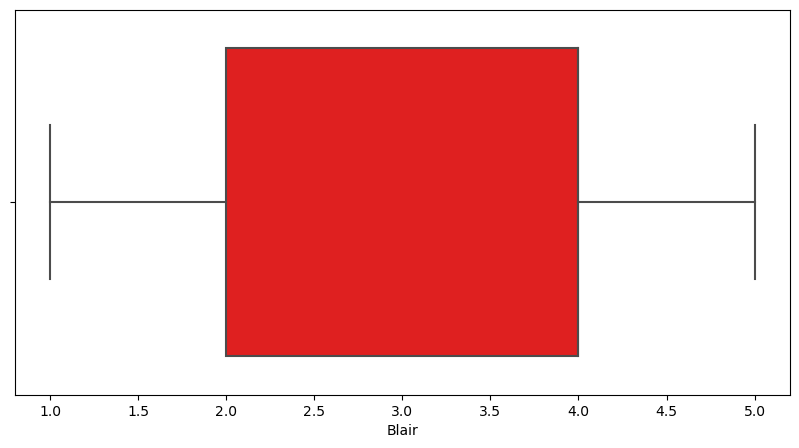

Description of Hague
----------------------------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


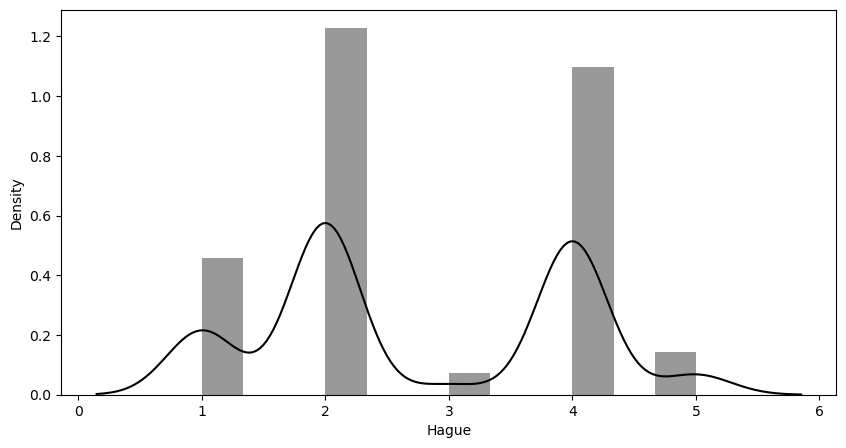

<Figure size 500x500 with 0 Axes>

BoxPlot of Hague
----------------------------------------------------------------------------


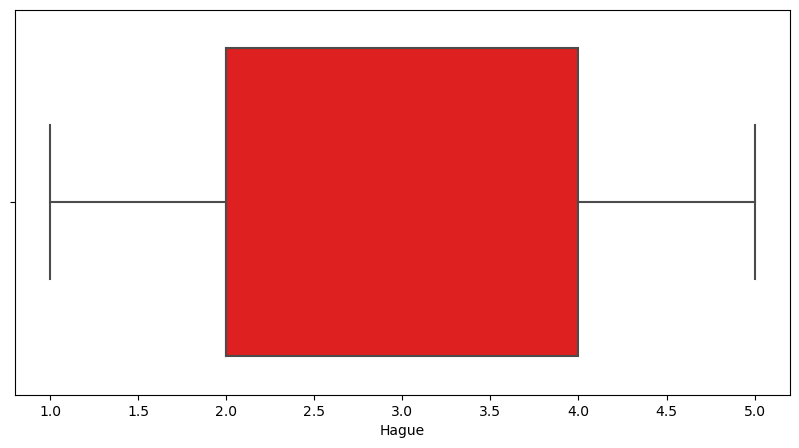

Description of Europe
----------------------------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


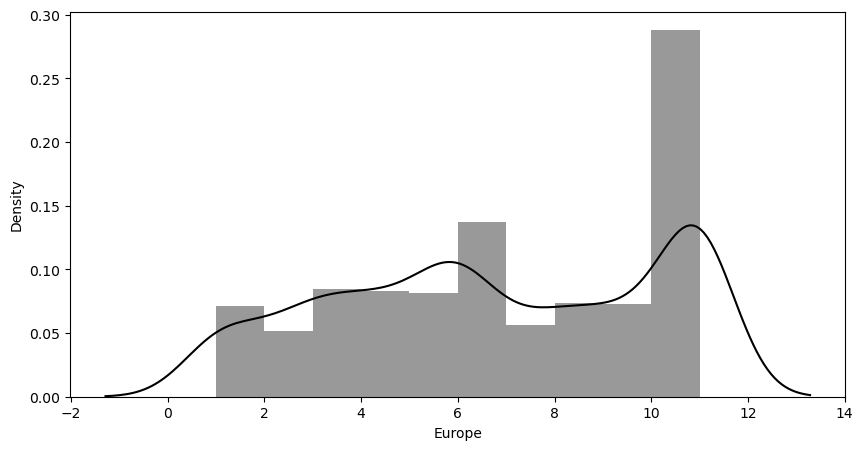

<Figure size 500x500 with 0 Axes>

BoxPlot of Europe
----------------------------------------------------------------------------


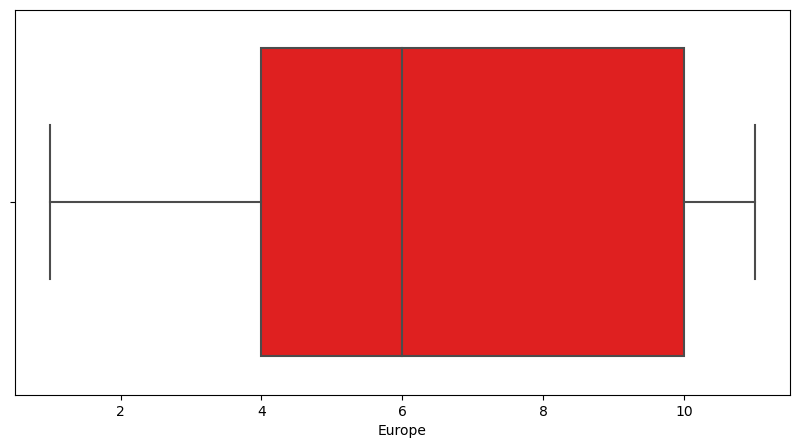

Description of political.knowledge
----------------------------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Distribution of political.knowledge
----------------------------------------------------------------------------


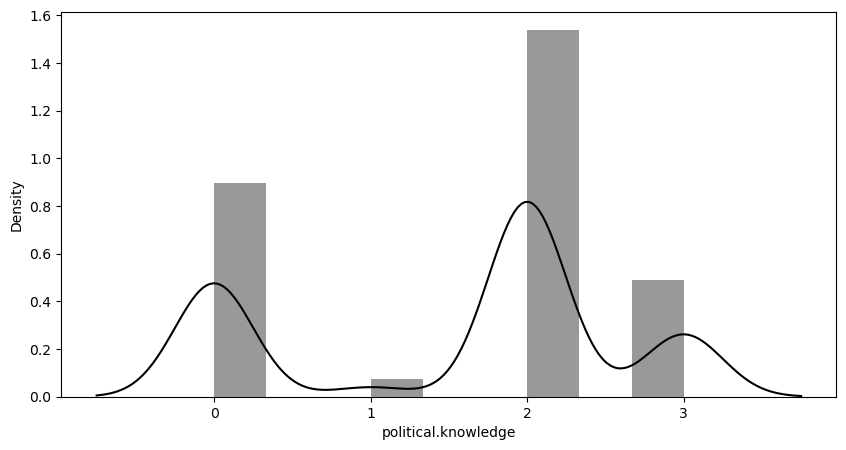

<Figure size 500x500 with 0 Axes>

BoxPlot of political.knowledge
----------------------------------------------------------------------------


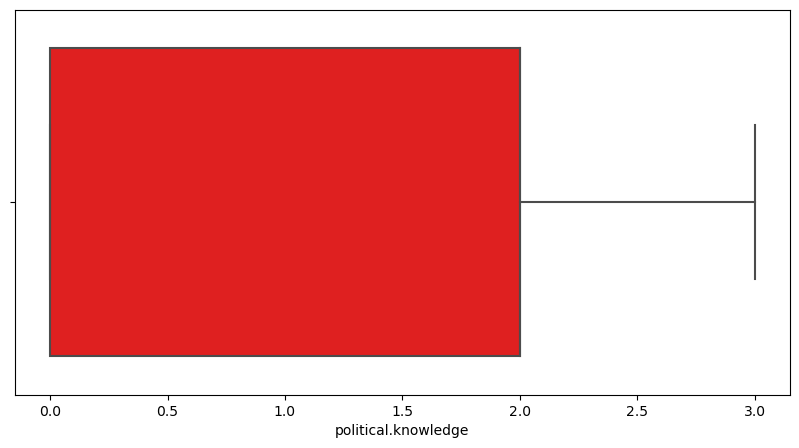

In [15]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

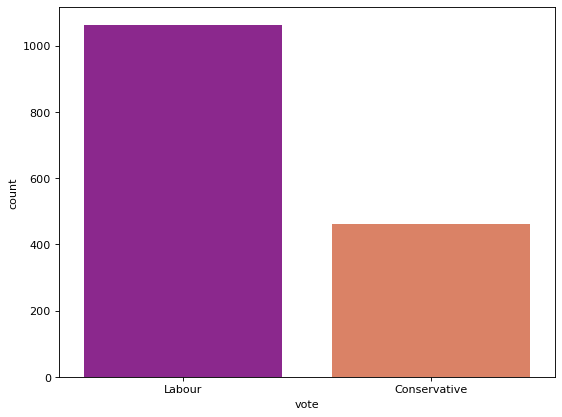

In [16]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(df['vote'], palette='plasma')
plt.show();

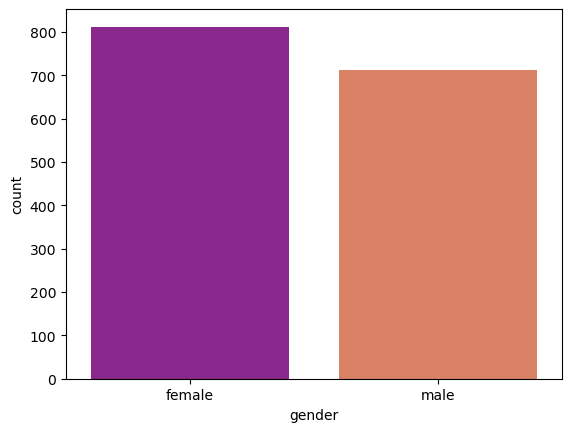

In [17]:
sns.countplot(df['gender'], palette='plasma')
plt.show();

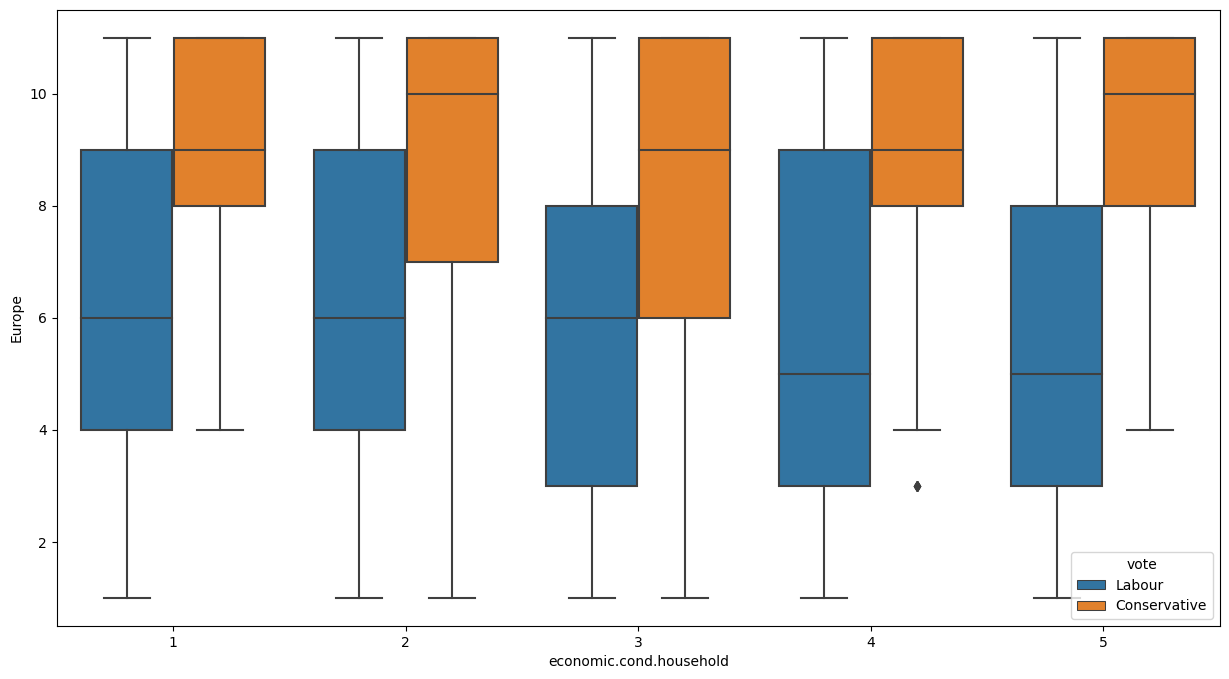

In [18]:
plt.figure(figsize=(15,8))
sns.despine(top = False, right=False, trim=False, left=True)
sns.boxplot(data=df, x="economic.cond.household", y="Europe", hue='vote')

plt.show()

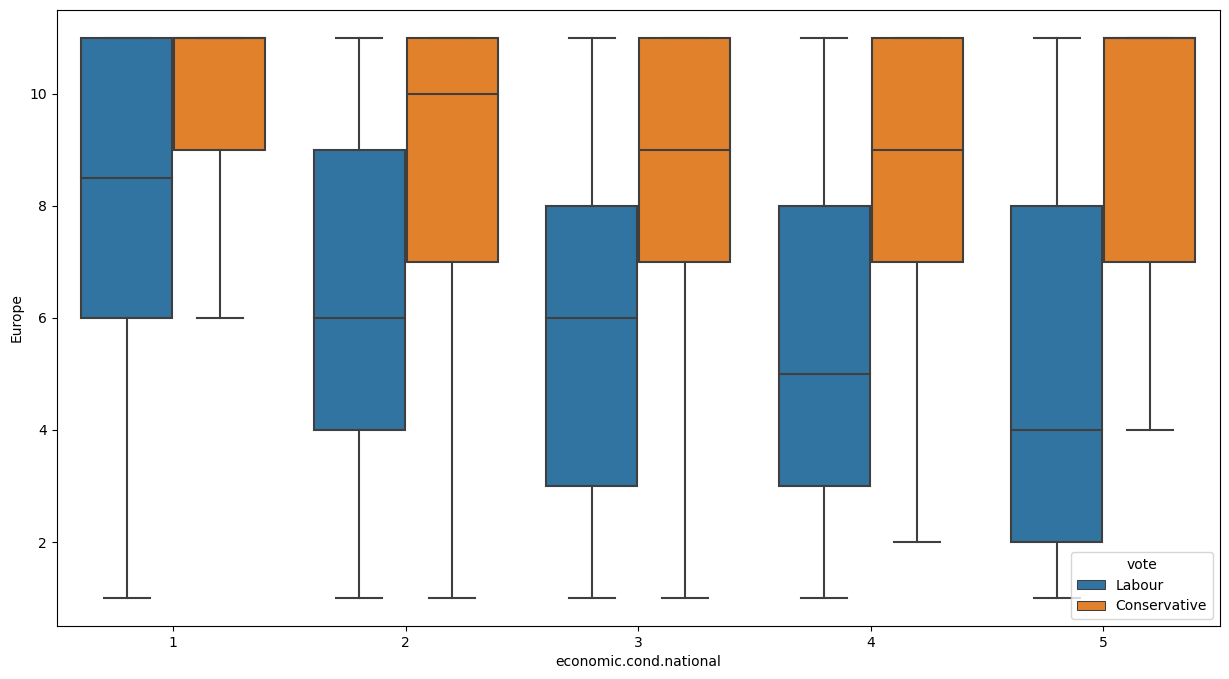

In [19]:
plt.figure(figsize=(15,8))
sns.despine(top = False, right=False, trim=False, left=True)
sns.boxplot(data=df, x="economic.cond.national", y="Europe", hue='vote')

plt.show()

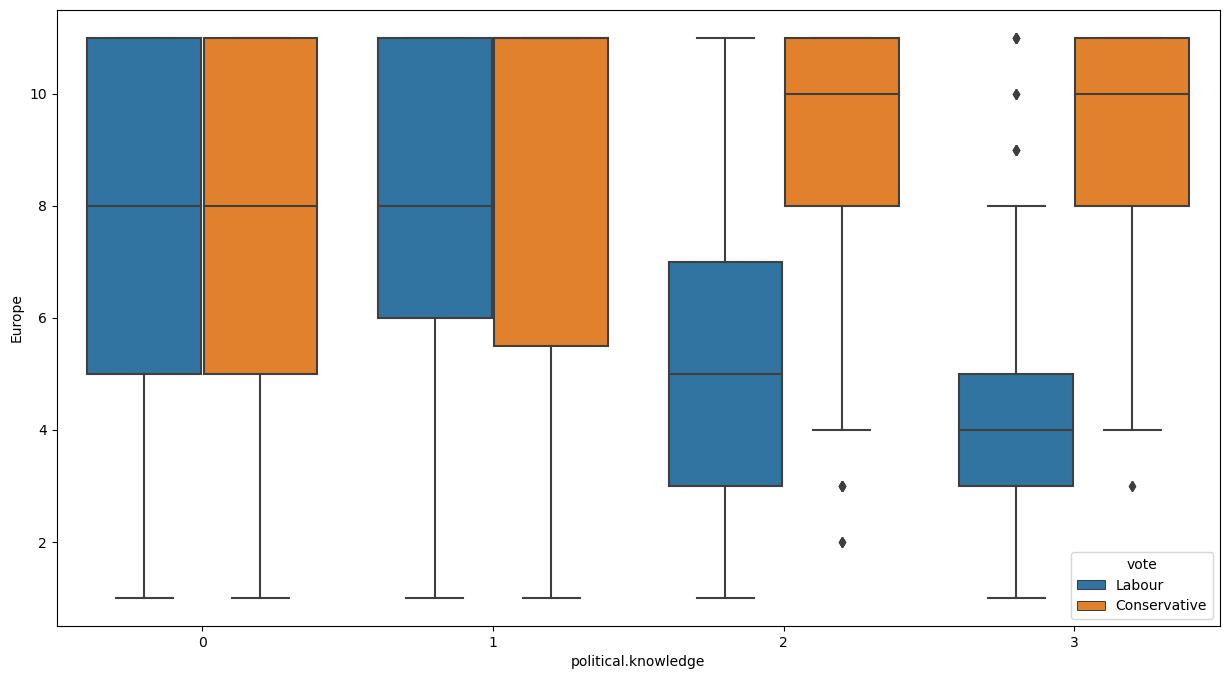

In [20]:
plt.figure(figsize=(15,8))
sns.despine(top = False, right=False, trim=False, left=True)
sns.boxplot(data=df, x="political.knowledge", y="Europe", hue='vote')
plt.show()

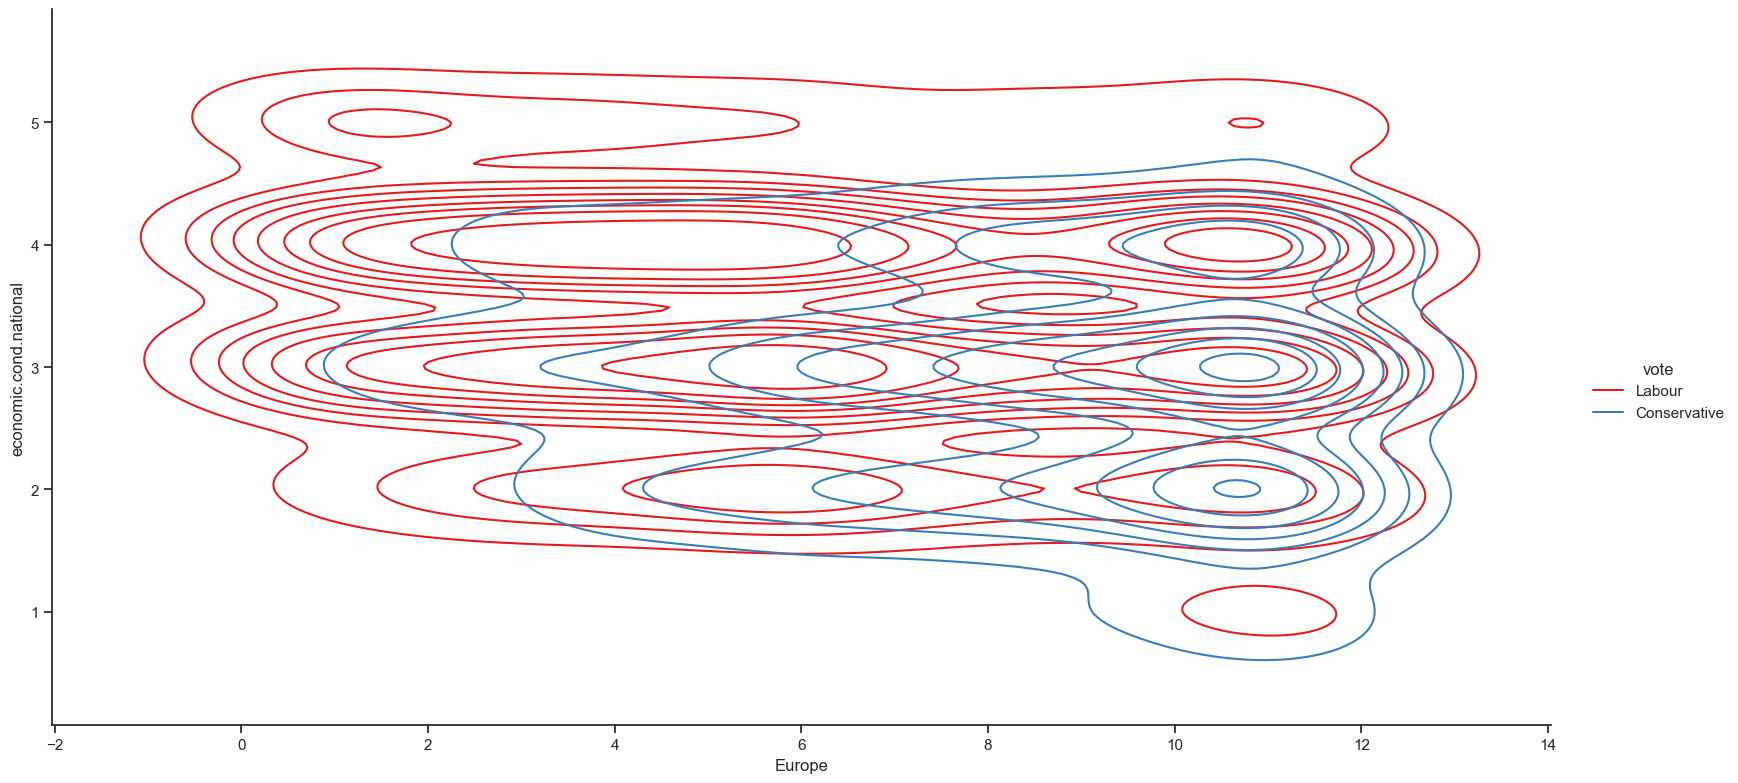

In [21]:
sns.set_theme(style="ticks")
sns.displot(df, x="Europe", y='economic.cond.national', hue="vote", kind="kde", palette='Set1', height= 8, aspect=2)
#sns.boxplot(data=df, x="Europe", y="economic.cond.national")
#plt.grid(False)
plt.show()

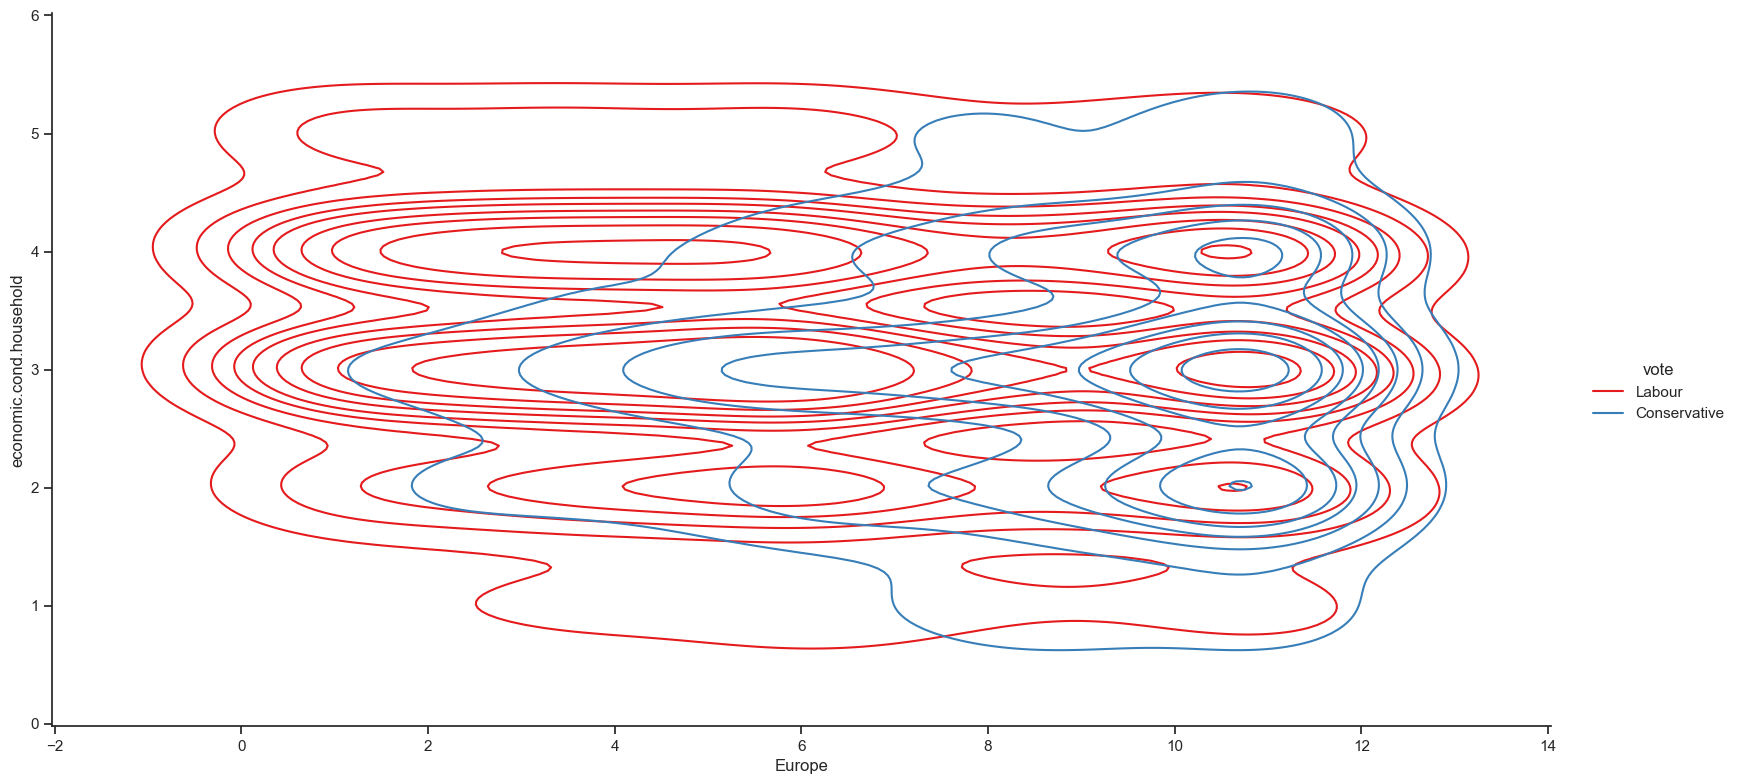

In [22]:
sns.set_theme(style="ticks")
sns.displot(df, x="Europe", y='economic.cond.household', hue="vote", kind="kde", palette='Set1', height= 8, aspect=2)
#sns.boxplot(data=df, x="Hague", y="Europe")
#plt.grid(False)
plt.show()

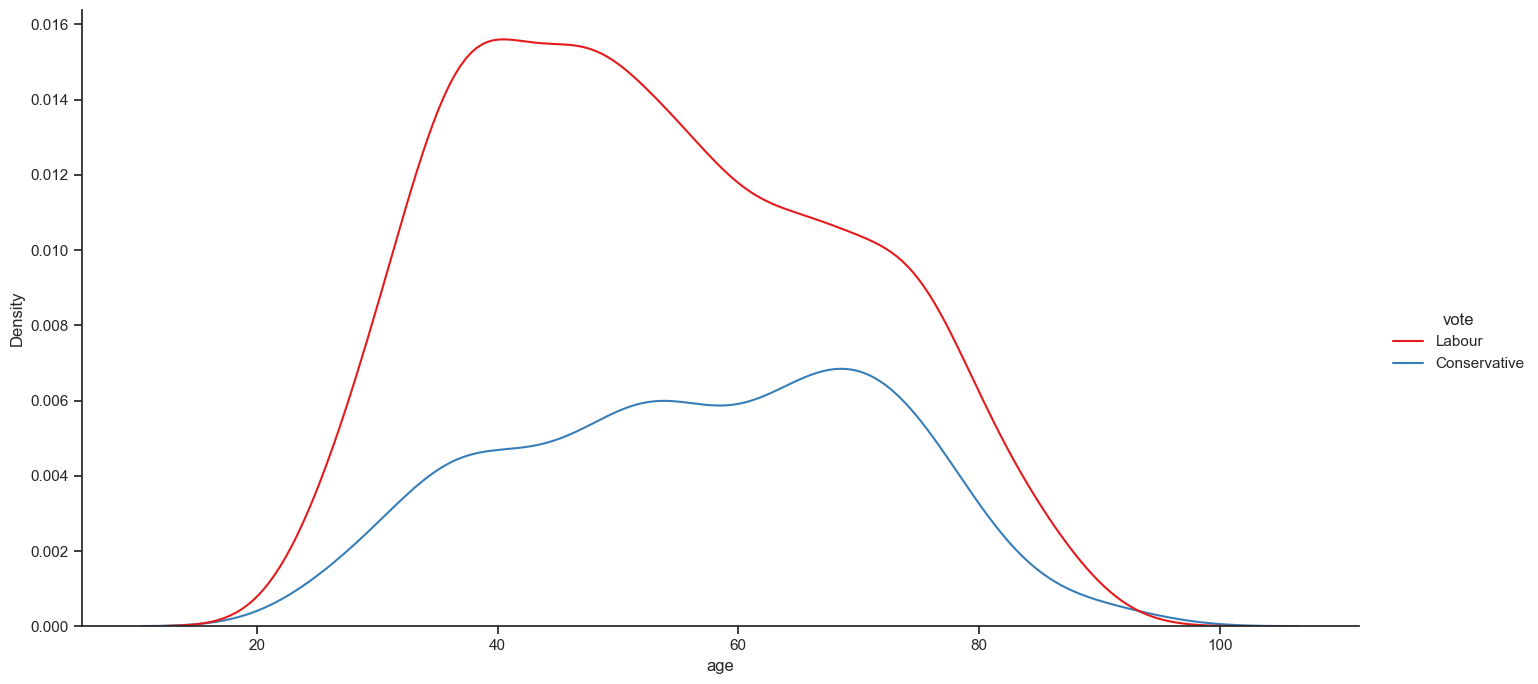

In [23]:
sns.set_theme(style="ticks")
sns.displot(data=df, x="age", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

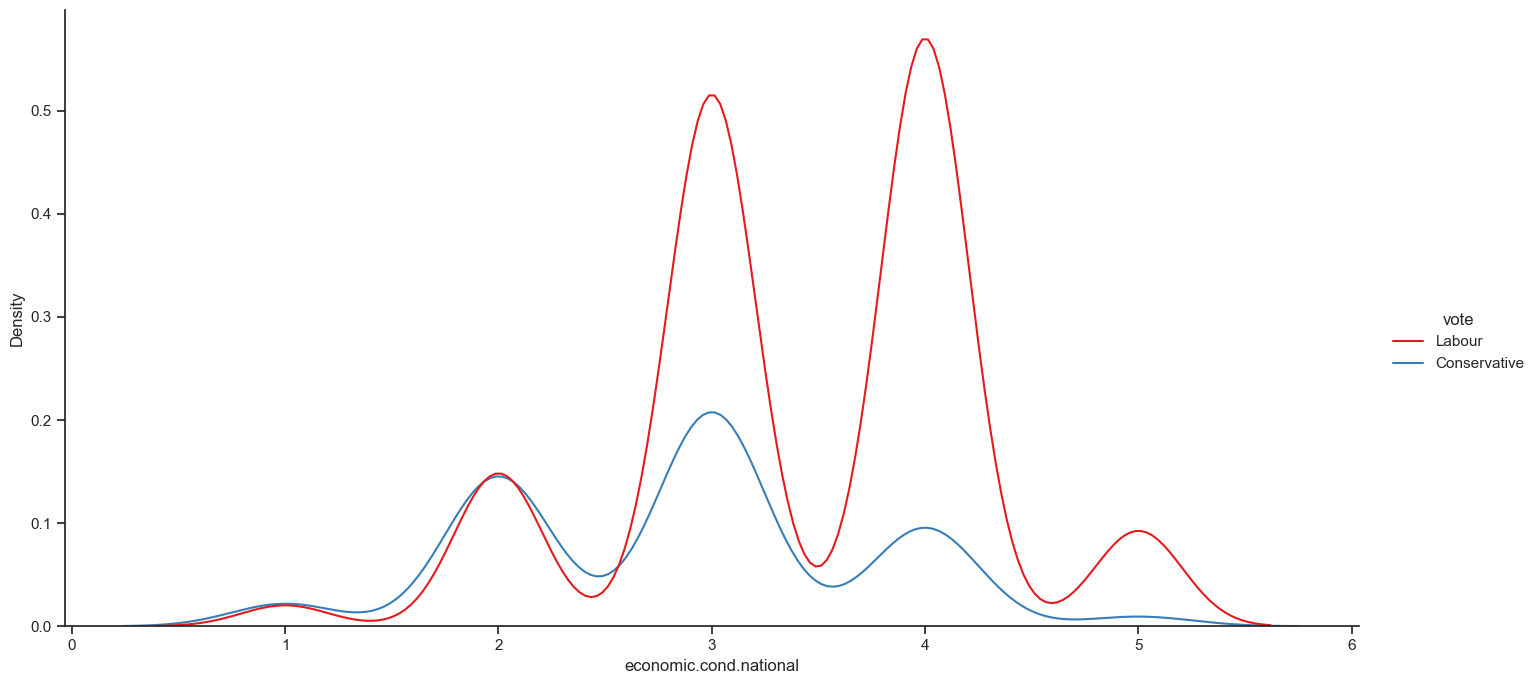

In [24]:
sns.set_theme(style="ticks")
sns.displot(data=df, x="economic.cond.national", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

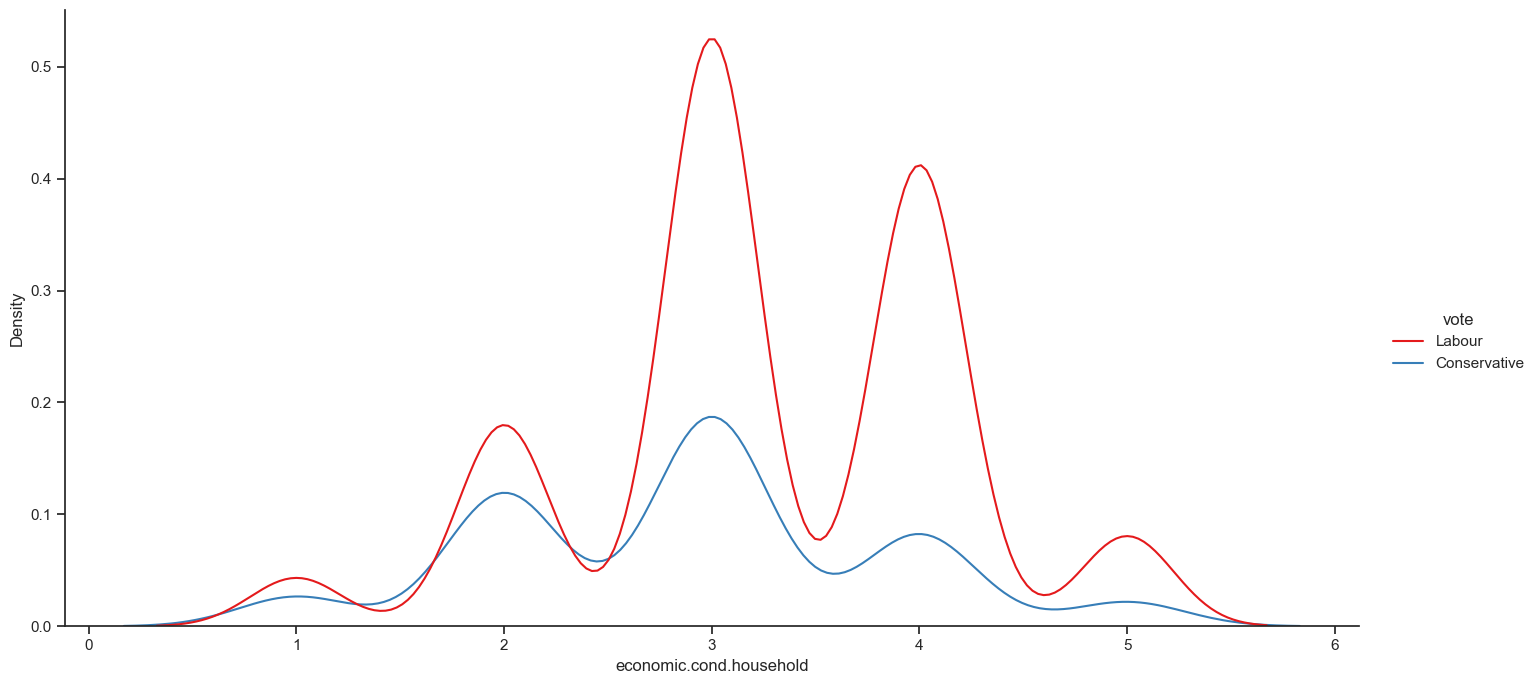

In [25]:
sns.set_theme(style="ticks")
sns.displot(data=df, x="economic.cond.household", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

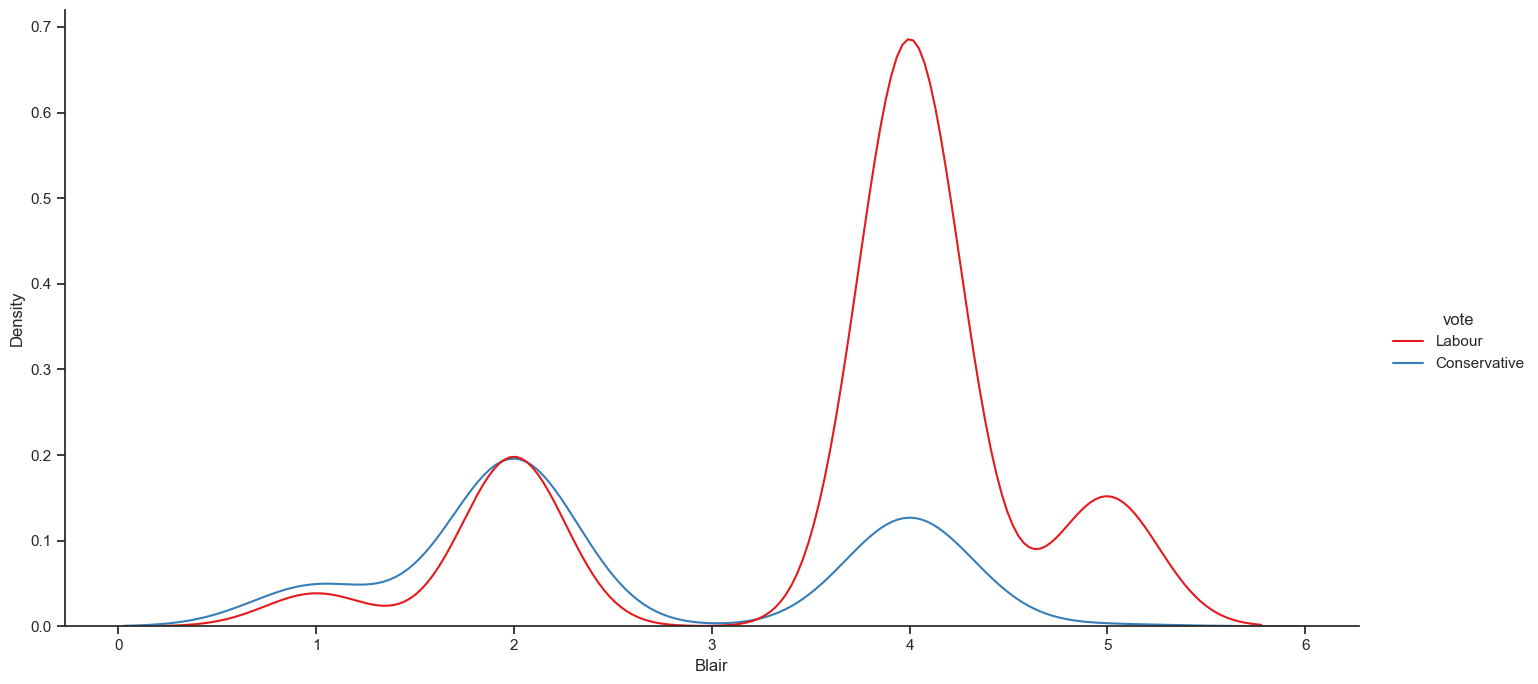

In [26]:
#sns.set_theme(style="ticks")
sns.displot(data=df, x="Blair", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

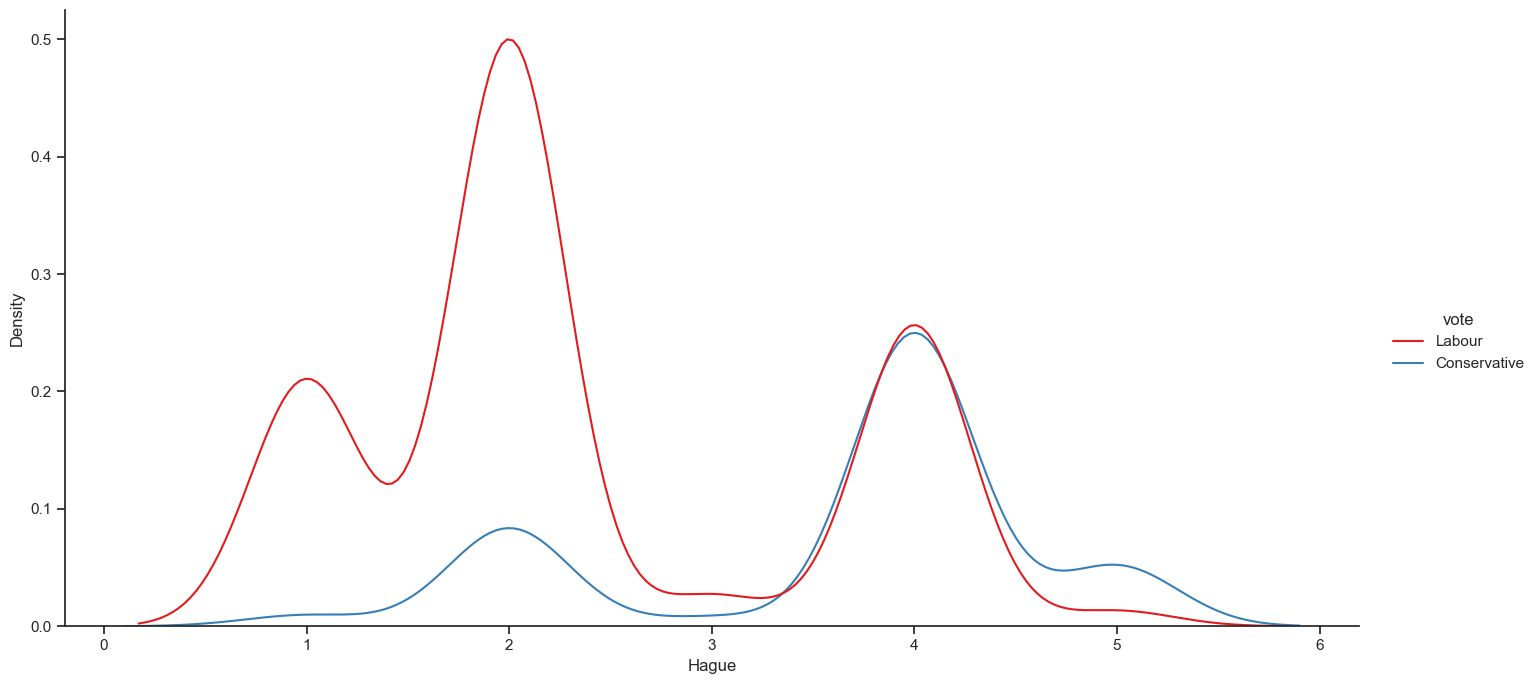

In [27]:
sns.displot(data=df, x="Hague", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

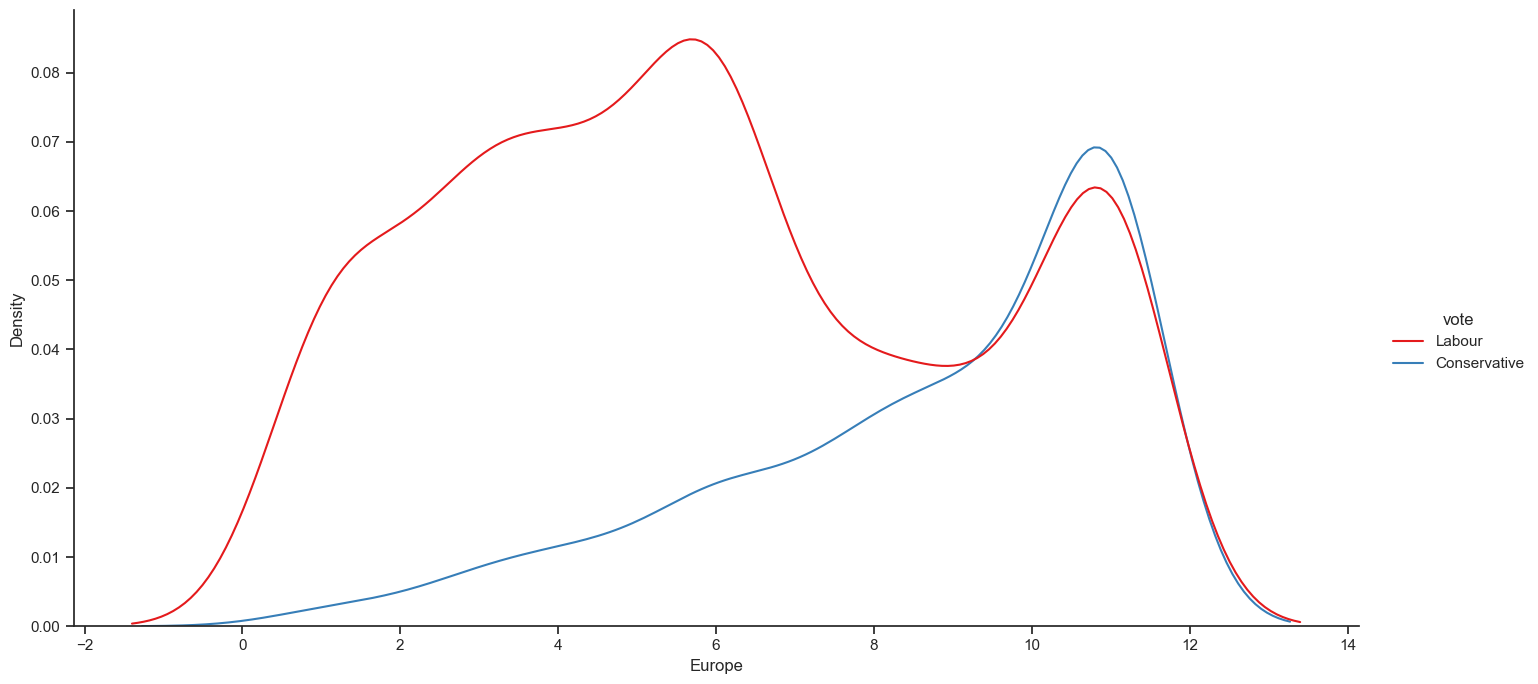

In [28]:
sns.displot(data=df, x="Europe", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

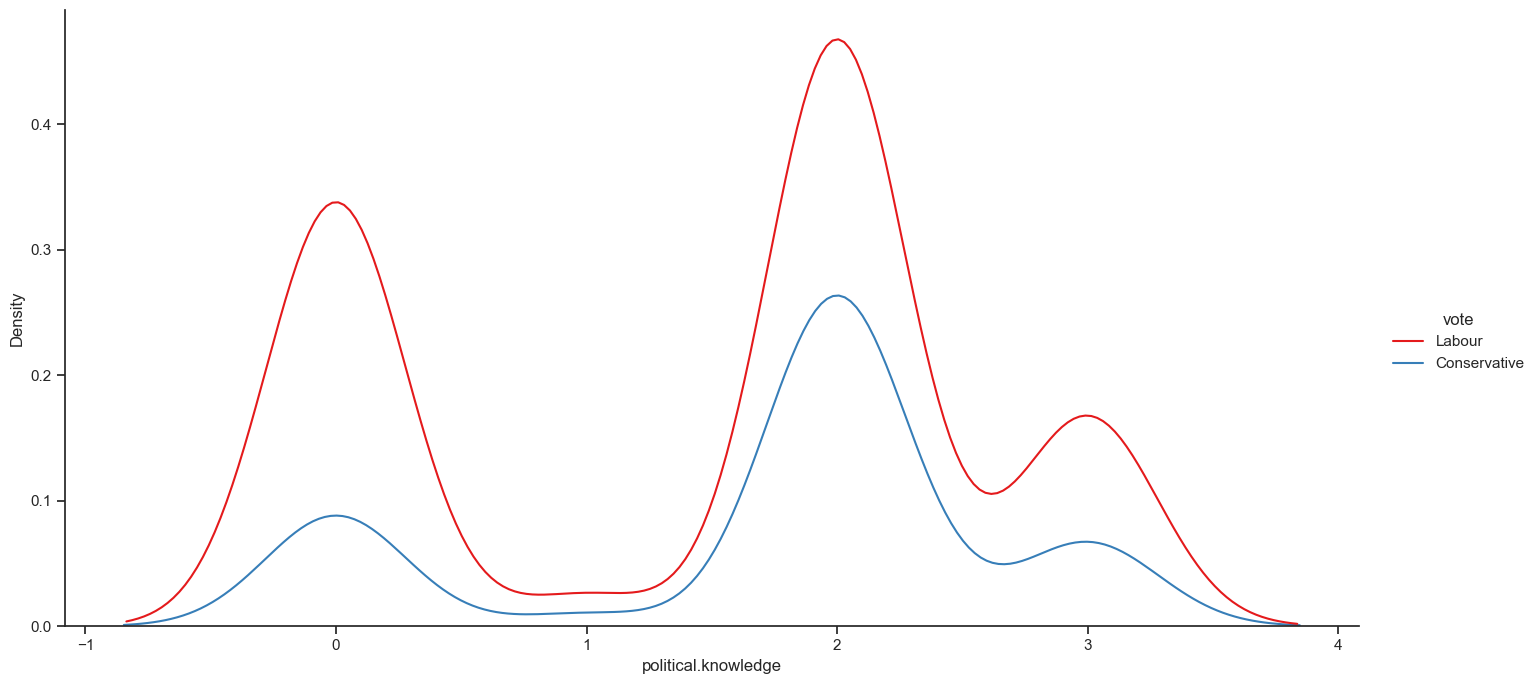

In [29]:
sns.displot(data=df, x="political.knowledge", hue="vote", kind="kde", palette='Set1',height=7, aspect=2)
plt.show()

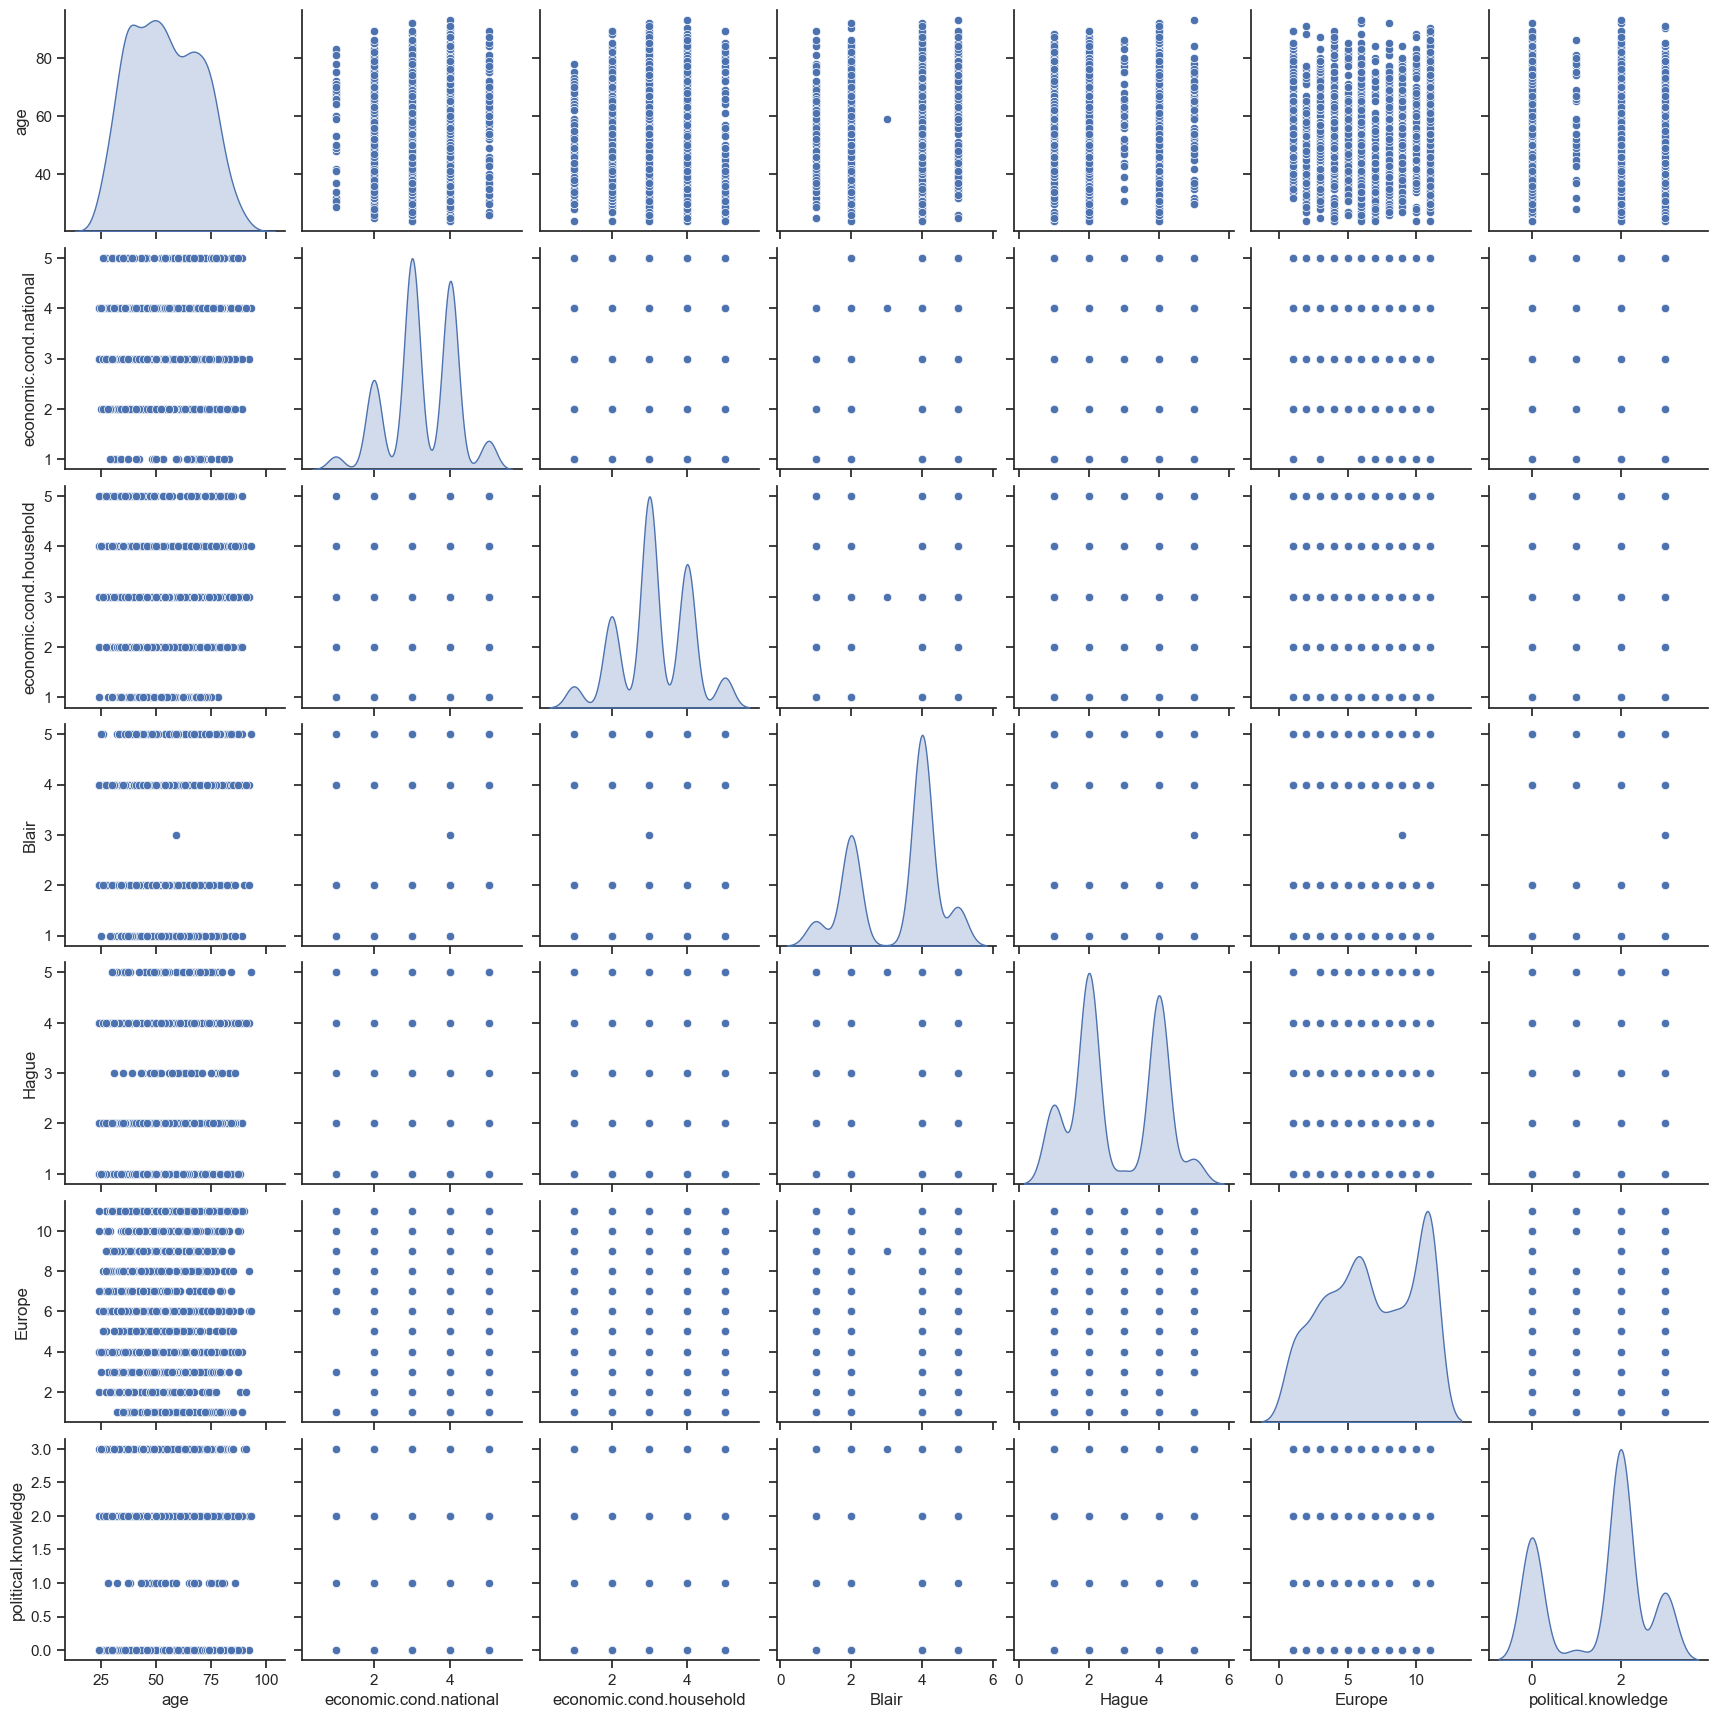

In [30]:
sns.pairplot(df,diag_kind='kde');

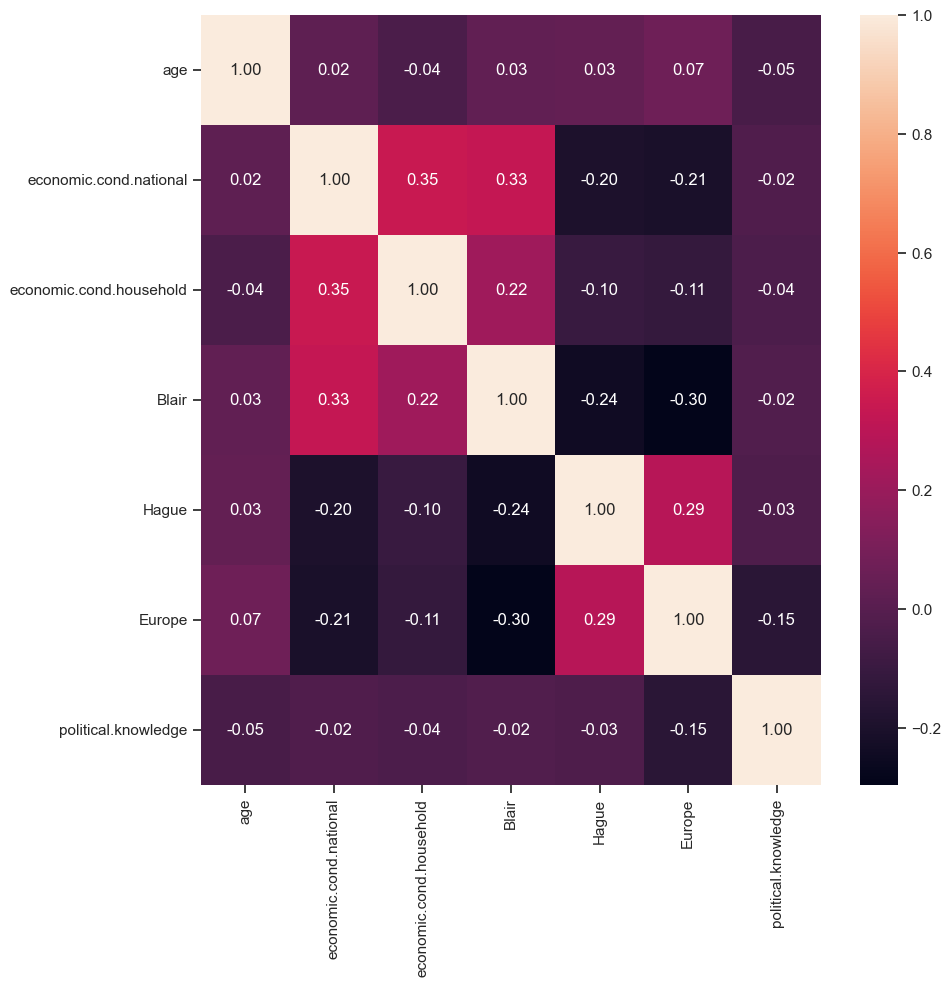

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [32]:
for column in df[['vote', 'gender']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [33]:
# Converting Object data into numerical values
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [34]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

# Treating the outliers

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:

for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

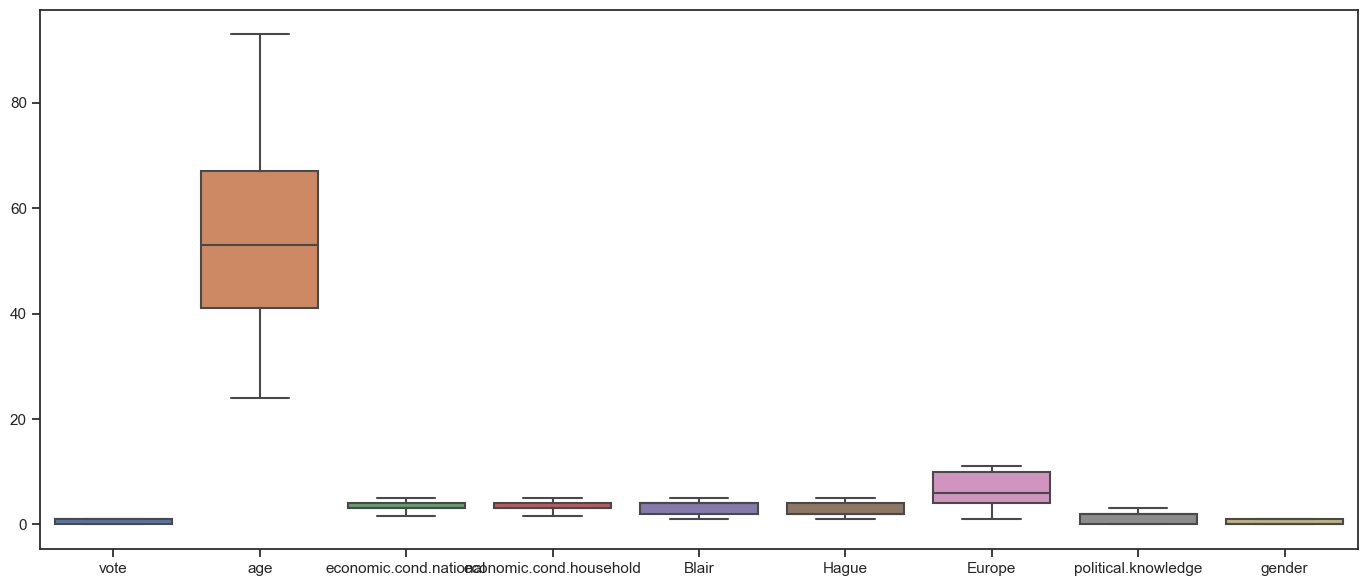

In [37]:
import seaborn as sns
from matplotlib.pyplot import figure
#sns.set_theme(style="whitegrid")
figure(figsize=(17,7))
sns.boxplot(data=df)

# Scaling the model

In [38]:
# We can take the Dataframe from the previous modeling process to build the model by Scaling the Data 
df2 = df
df2.head()

vote   age  economic.cond.national  economic.cond.household  Blair  Hague  \
0   1.0  43.0                     3.0                      3.0    4.0    1.0   
1   1.0  36.0                     4.0                      4.0    4.0    4.0   
2   1.0  35.0                     4.0                      4.0    5.0    2.0   
3   1.0  24.0                     4.0                      2.0    2.0    1.0   
4   1.0  41.0                     2.0                      2.0    1.0    1.0   

   Europe  political.knowledge  gender  
0     2.0                  2.0     0.0  
1     5.0                  2.0     1.0  
2     3.0                  2.0     1.0  
3     4.0                  0.0     0.0  
4     6.0                  2.0     1.0

In [39]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc

StandardScaler()

In [40]:
df['age'] = stdsc.fit_transform(df[['age']])
df['economic.cond.national'] = stdsc.fit_transform(df[['economic.cond.national']])
df['economic.cond.household'] = stdsc.fit_transform(df[['economic.cond.household']])
df['Blair'] = stdsc.fit_transform(df[['Blair']])
df['Hague'] = stdsc.fit_transform(df[['Hague']])
df['Europe'] = stdsc.fit_transform(df[['Europe']])
df['political.knowledge'] = stdsc.fit_transform(df[['political.knowledge']])
df['gender'] = stdsc.fit_transform(df[['gender']])

In [41]:
dfs = df
df2 = df
dfs.head()

vote       age  economic.cond.national  economic.cond.household     Blair  \
0   1.0 -0.711973               -0.302622                -0.182644  0.566716   
1   1.0 -1.157661                0.870182                 0.947305  0.566716   
2   1.0 -1.221331                0.870182                 0.947305  1.418187   
3   1.0 -1.921698                0.870182                -1.312594 -1.136225   
4   1.0 -0.839313               -1.475425                -1.312594 -1.987695   

      Hague    Europe  political.knowledge    gender  
0 -1.419886 -1.434426             0.422643 -0.937059  
1  1.018544 -0.524358             0.422643  1.067169  
2 -0.607076 -1.131070             0.422643  1.067169  
3 -1.419886 -0.827714            -1.424148 -0.937059  
4 -1.419886 -0.221002             0.422643  1.067169

In [42]:
# Copy all the predictor variables into X dataframe
X = df2.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df2[['vote']]

In [43]:
X

age  economic.cond.national  economic.cond.household     Blair  \
0    -0.711973               -0.302622                -0.182644  0.566716   
1    -1.157661                0.870182                 0.947305  0.566716   
2    -1.221331                0.870182                 0.947305  1.418187   
3    -1.921698                0.870182                -1.312594 -1.136225   
4    -0.839313               -1.475425                -1.312594 -1.987695   
...        ...                     ...                      ...       ...   
1520  0.816100                2.042985                -0.182644 -1.136225   
1521  1.198118               -1.475425                -1.312594  0.566716   
1522 -1.093992               -0.302622                -0.182644  1.418187   
1523  0.434081               -0.302622                -0.182644 -1.987695   
1524  1.261787               -1.475425                -0.182644 -1.136225   

         Hague    Europe  political.knowledge    gender  
0    -1.419886 -1.434426             0.422643 -0.937059  
1     1.018544 -0.524358             0.422643  1.067169  
2    -0.607076 -1.131070             0.422643  1.067169  
3    -1.419886 -0.827714            -1.424148 -0.937059  
4    -1.419886 -0.221002             0.422643  1.067169  
...        ...       ...                  ...       ...  
1520  1.018544  1.295778             1.346038  1.067169  
1521  1.018544  0.385710             0.422643  1.067169  
1522  1.018544 -1.434426             0.422643  1.067169  
1523  1.018544  1.295778             0.422643  1.067169  
1524  1.018544  1.295778            -1.424148 -0.937059  

[1525 rows x 8 columns]

In [44]:
y

vote
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
1520   0.0
1521   0.0
1522   1.0
1523   0.0
1524   0.0

[1525 rows x 1 columns]

# Applying Logistic Regression without GridSearchCV Function

In [45]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [46]:
y_train.value_counts()

vote
1.0     735
0.0     332
dtype: int64

# 1.Applying Logisitic Regression

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [49]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [50]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.921946  0.078054
1  0.690526  0.309474
2  0.346669  0.653331
3  0.488887  0.511113
4  0.158897  0.841103

# Model Evaluation

In [51]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8406747891283973

In [52]:
# Accuracy - Testing Data
model.score(X_test, y_test)

0.8209606986899564

# Confusion / Classification - Training Data

In [53]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

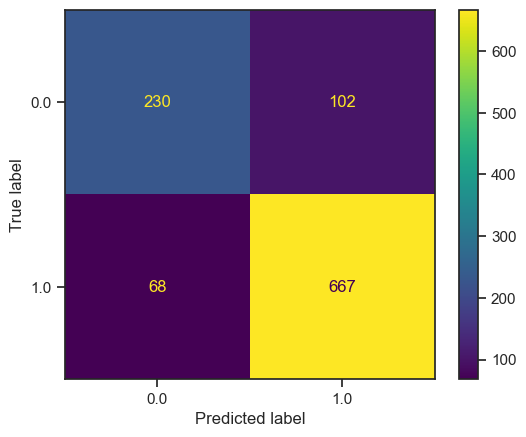

In [54]:
plot_confusion_matrix(model,X_train,y_train, colorbar=True);
plt.grid(False)

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



# Confusion / Classification for Test Data

In [56]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

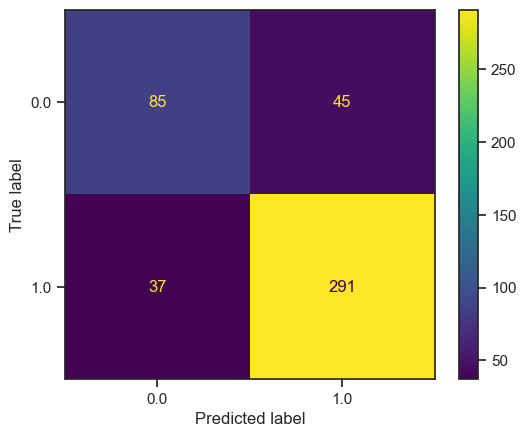

In [57]:
plot_confusion_matrix(model,X_test,y_test);
plt.grid(False)

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



# AUC and ROC for Training Data

AUC: 0.890


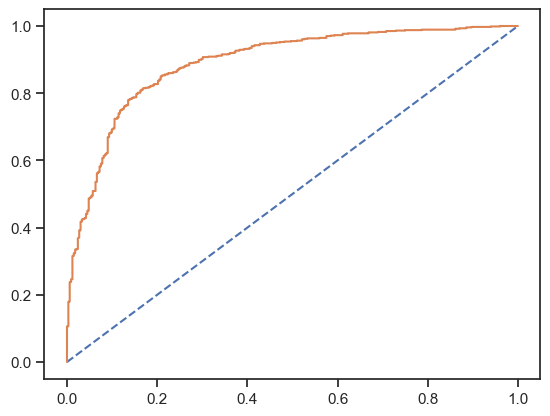

In [59]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# AUC and ROC for the test data

AUC: 0.890


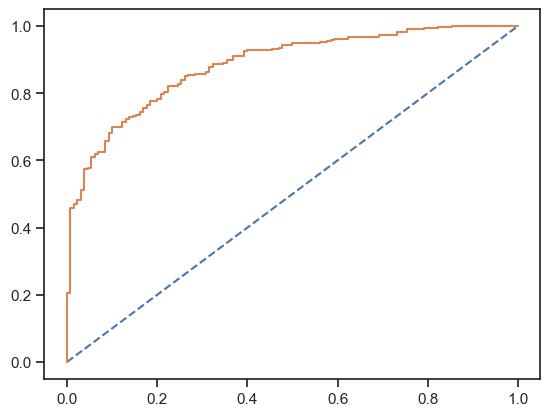

In [60]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 1.1 Applying GridsearchCV for Logistic Regression

In [61]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear','saga','sag','lbfgs'],
      'tol':[ 0.0001,0.00001,0.000001]}

In [62]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [63]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='f1')

In [65]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear')


In [66]:
best_model = grid_search.best_estimator_

In [67]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [68]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.919874  0.080126
1  0.689335  0.310665
2  0.349675  0.650325
3  0.489659  0.510341
4  0.163316  0.836684

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



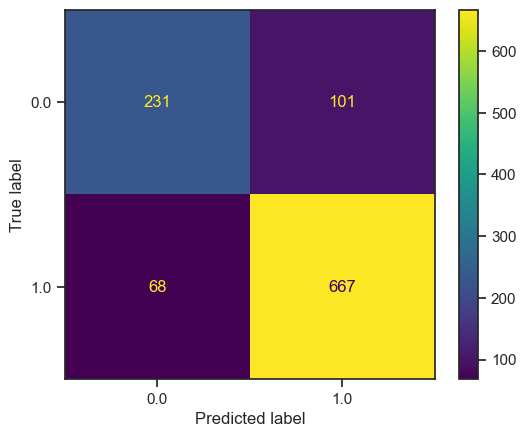

In [69]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
plt.grid(False)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



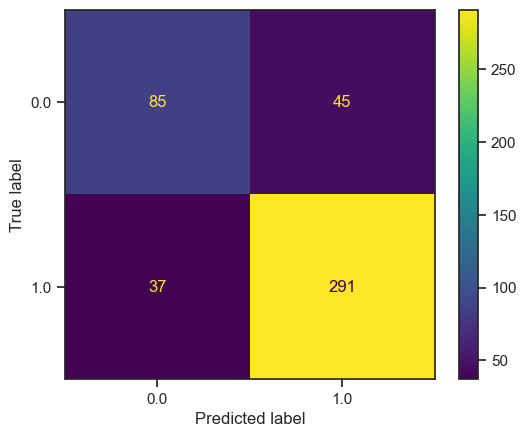

In [70]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
plt.grid(False)
print(classification_report(y_test, ytest_predict),'\n');

# AUC ROC for Training Data

AUC: 0.890


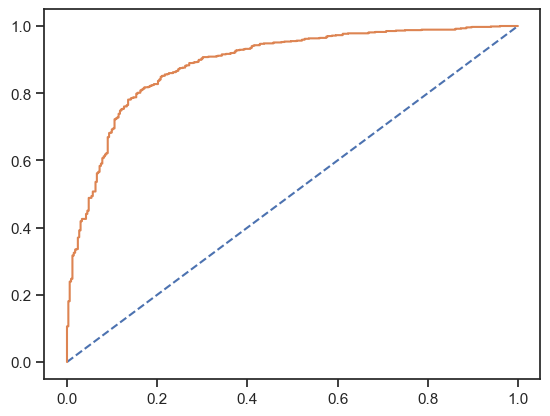

In [71]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# AUC ROC For Test Data

AUC: 0.890


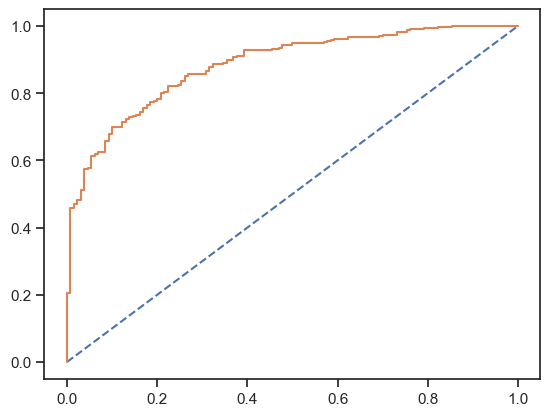

In [72]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 1.3 Logistic Regression with SMOTE

In [73]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [74]:
conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
df3 = df2
X =  df3.drop("vote",axis=1) ## Features
y = df3["vote"]  ## Target

In [84]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [85]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [86]:
lrmodel = LogisticRegression(max_iter=10000, n_jobs=2, solver='saga', tol=1e-05)
lrmodel.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=10000, n_jobs=2, solver='saga', tol=1e-05)

0.8251700680272109
[[603 132]
 [125 610]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



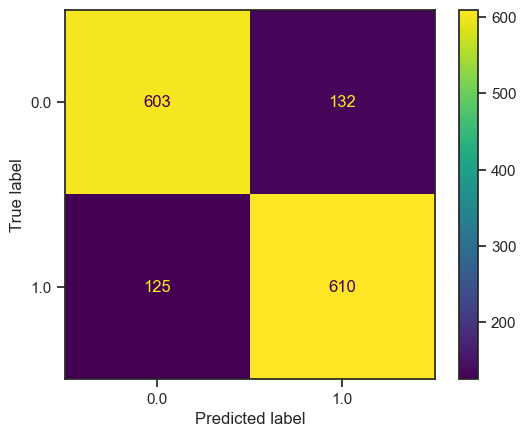

In [87]:
## Performance Matrix on train data set with SMOTE
y_train_predict = lrmodel.predict(X_train_res)
model_score = lrmodel.score(X_train_res, y_train_res)
plot_confusion_matrix(lrmodel,X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

AUC: 0.897


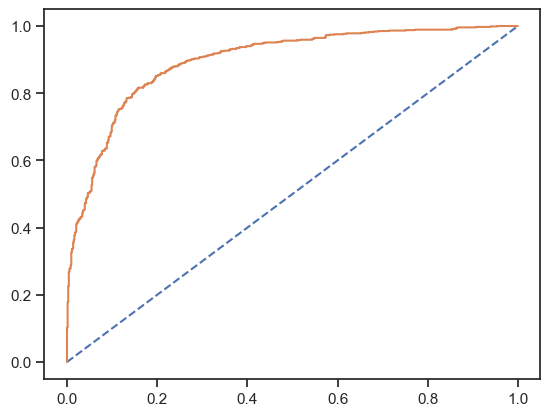

In [88]:
# predict probabilities
probs = lrmodel.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.897


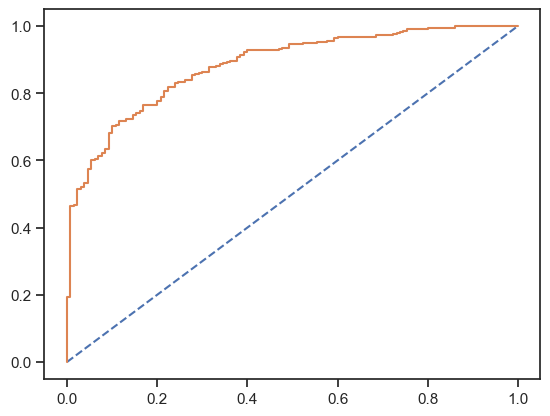

In [89]:
# predict probabilities
probs = lrmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# LDA Model

In [90]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [91]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       332
         1.0       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



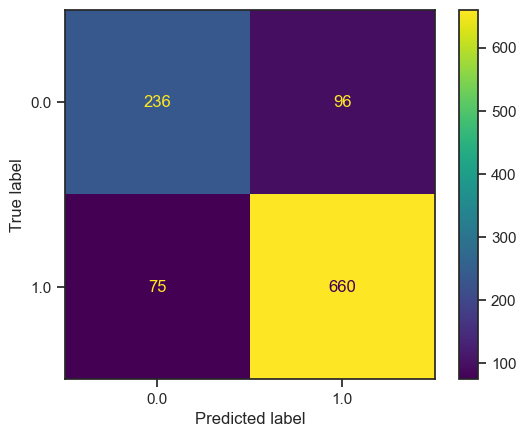

In [92]:
## Confusion matrix on the training data

plot_confusion_matrix(model,X_train,y_train)
print(classification_report(y_train, pred_class_train),'\n');

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67       130
         1.0       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



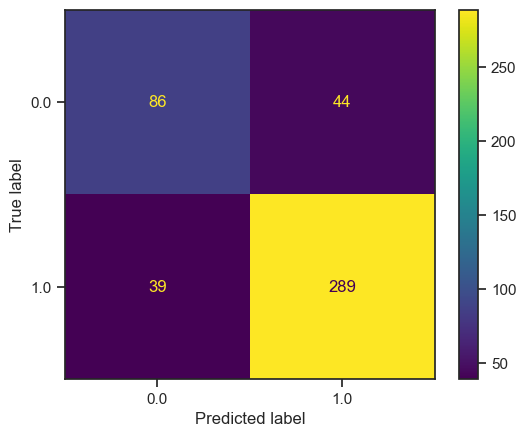

In [93]:
## Confusion matrix on the Test data

plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, pred_class_test),'\n');

In [94]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


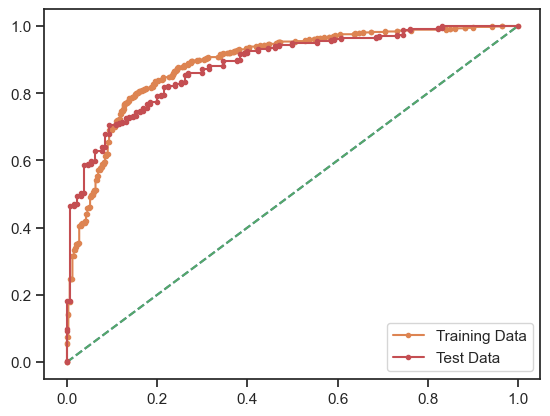

<Figure size 900000x900000 with 0 Axes>

In [95]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
from matplotlib.pyplot import figure
plt.figure(figsize=(9000,9000))
plt.show()

# LDA Grid Search CV

In [96]:
est1 = LinearDiscriminantAnalysis(shrinkage='auto')
part1 = {
    'solver' : ('lsqr','eigen'),'n_components' : (1,5,1),
}

In [97]:
clf = GridSearchCV(estimator=est1, param_grid=part1, n_jobs=2, cv=2)

In [98]:
ldamodel = clf.fit(X_train,y_train)
ldamodel

GridSearchCV(cv=2, estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
             n_jobs=2,
             param_grid={'n_components': (1, 5, 1),
                         'solver': ('lsqr', 'eigen')})

In [99]:
clf.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [100]:
best_lda = clf.best_estimator_

In [101]:
ytrain_predict2 = best_lda.predict(X_train)
ytest_predict2 = best_lda.predict(X_test)

In [102]:
model_score2 = best_lda.score(X_train, y_train)

0.8416119962511716
[[238  94]
 [ 75 660]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       332
         1.0       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



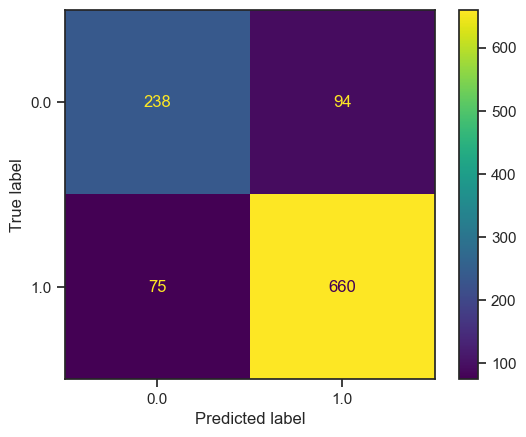

In [103]:
print(model_score2)
plot_confusion_matrix(ldamodel,X_train,y_train)
print(metrics.confusion_matrix(y_train, ytrain_predict2))
print(metrics.classification_report(y_train, ytrain_predict2))

In [104]:
model_scoretest2 = best_lda.score(X_test, y_test)

0.8231441048034934
[[ 89  41]
 [ 40 288]]
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       130
         1.0       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



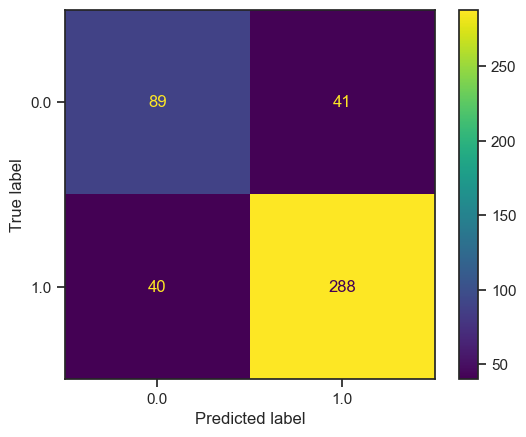

In [108]:
print(model_scoretest2)

plot_confusion_matrix(ldamodel,X_test,y_test)
print(metrics.confusion_matrix(y_test, ytest_predict2))
print(metrics.classification_report(y_test, ytest_predict2))

AUC: 0.890


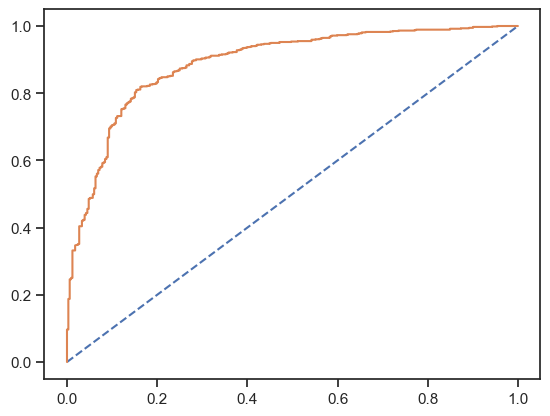

In [106]:
# predict probabilities
probs = ldamodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


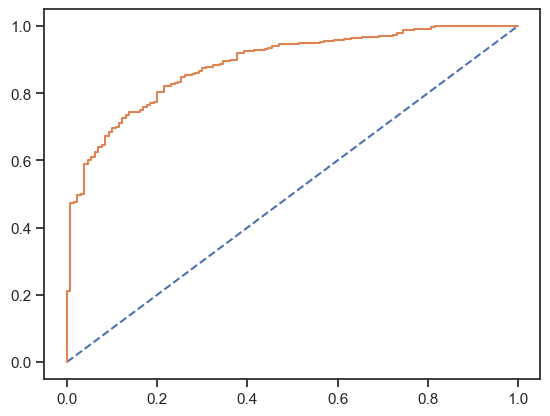

In [107]:
# predict probabilities
probs = ldamodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 2.2 LDA Model with SMOTE

In [110]:
sm = SMOTE (random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [111]:
ldamodelsm = LinearDiscriminantAnalysis(n_components= 1, solver= 'lsqr')
ldamodelsm.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

0.8231292517006803
[[601 134]
 [126 609]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



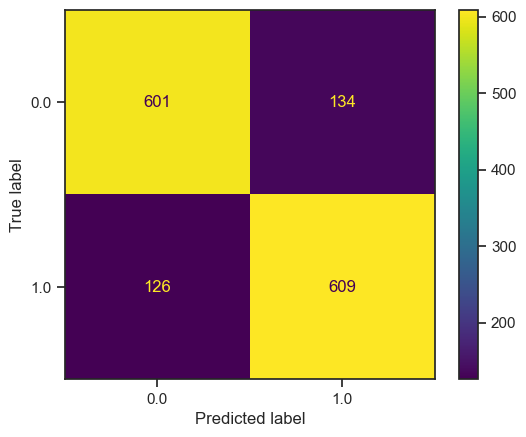

In [112]:
## Performance Matrix on train data set with SMOTE
y_train_predict_ldasm = ldamodelsm.predict(X_train_res)
model_score_ldasm = ldamodelsm.score(X_train_res, y_train_res)
print(model_score_ldasm)
plot_confusion_matrix(ldamodelsm,X_train_res,y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict_ldasm))
print(metrics.classification_report(y_train_res, y_train_predict_ldasm))

0.7991266375545851
[[102  28]
 [ 64 264]]
              precision    recall  f1-score   support

         0.0       0.61      0.78      0.69       130
         1.0       0.90      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458



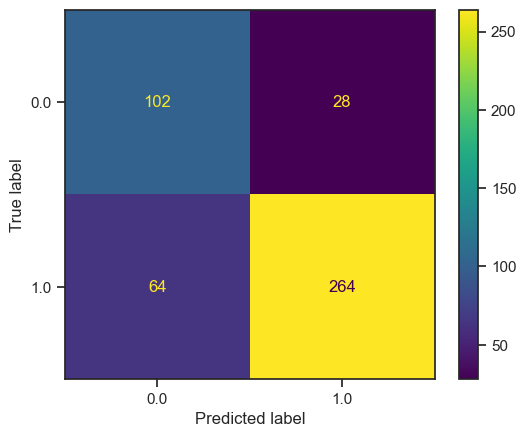

In [113]:
## Performance Matrix on Test data set with SMOTE
y_test_predict_ldasm = ldamodelsm.predict(X_test)
model_score_ldasm = ldamodelsm.score(X_test, y_test)
print(model_score_ldasm)
plot_confusion_matrix(ldamodelsm,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict_ldasm))
print(metrics.classification_report(y_test, y_test_predict_ldasm))

AUC: 0.897


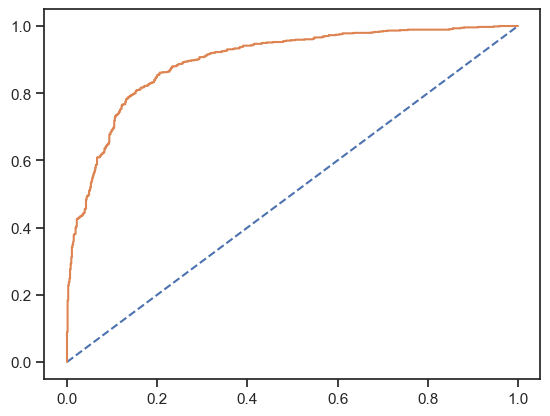

In [114]:
# predict probabilities
probs = ldamodelsm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.897


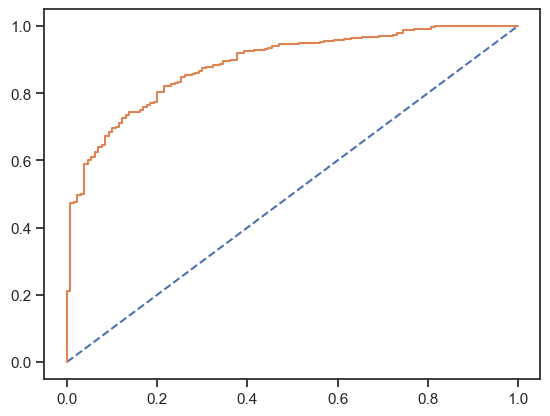

In [115]:
# predict probabilities
probs = ldamodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# 3. Gaussian Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [117]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       332
         1.0       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



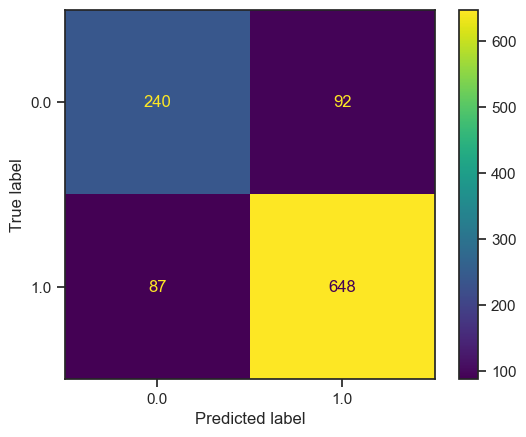

In [118]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
plot_confusion_matrix(NB_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       130
         1.0       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



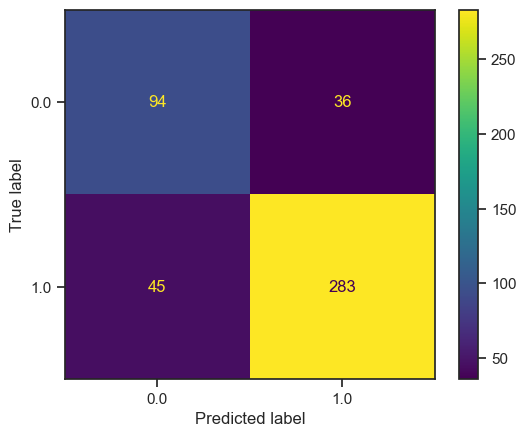

In [119]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
plot_confusion_matrix(NB_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

# Accuracy of the NB Model

In [120]:
NB_model.score(X_train, y_train)

0.8322399250234301

In [121]:
NB_model.score(X_test, y_test)

0.8231441048034934

AUC: 0.887


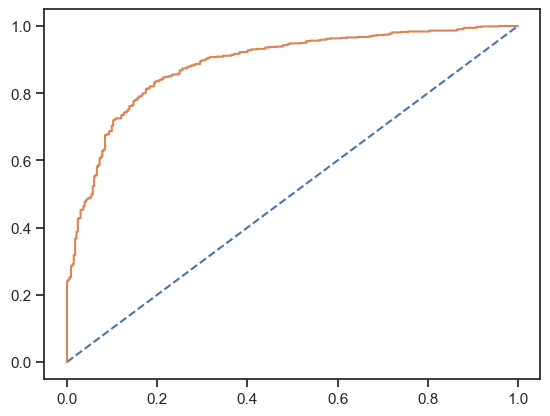

In [122]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.887


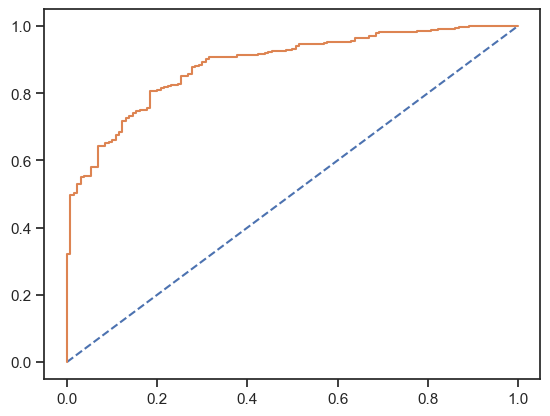

In [123]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 3.1 Gaussian Naive Bayes with Gridsearch CV

In [124]:
NB_modelgscv = GaussianNB()
param_grid_nb = { 'var_smoothing': [0.001,0.0001,0.00001,0.000001]
}
NB_modelgscv = GridSearchCV(NB_modelgscv, param_grid= param_grid_nb,  cv = 2 , n_jobs=2)
NB_modelgscv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GaussianNB(), n_jobs=2,
             param_grid={'var_smoothing': [0.001, 0.0001, 1e-05, 1e-06]})

In [125]:
NB_modelgscv.best_params_

{'var_smoothing': 0.001}

In [126]:
best_grid_nbgscv = NB_modelgscv.best_estimator_

In [127]:
ytrain_predictnbcv = best_grid_nbgscv.predict(X_train)
ytest_predictnbcv = best_grid_nbgscv.predict(X_test)

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       332
         1.0       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



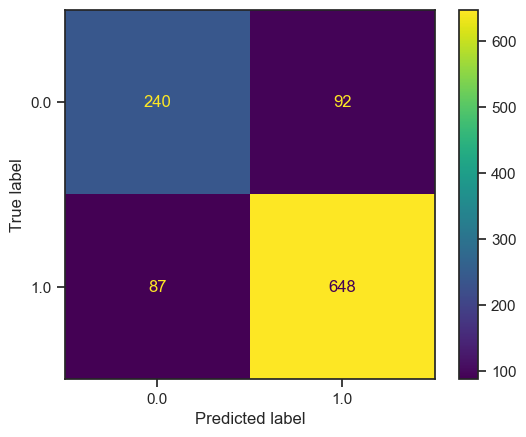

In [128]:
modelscorenbds = best_grid_nbgscv.score(X_train, y_train)
print(modelscorenbds)
plot_confusion_matrix(NB_modelgscv,X_train,y_train)
print(metrics.confusion_matrix(y_train, ytrain_predictnbcv))
print(metrics.classification_report(y_train, ytrain_predictnbcv))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       130
         1.0       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



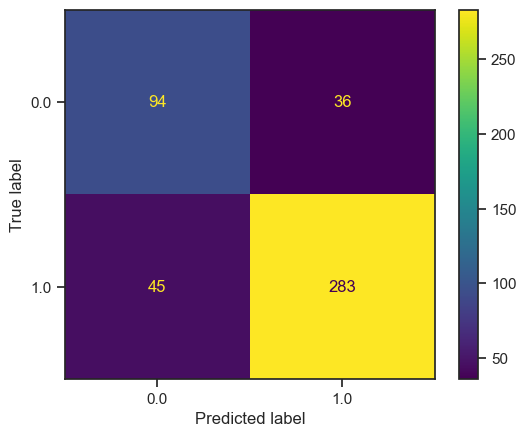

In [129]:
modelscorenbds = best_grid_nbgscv.score(X_test, y_test)
print(modelscorenbds)

plot_confusion_matrix(NB_modelgscv,X_test,y_test)
print(metrics.confusion_matrix(y_test, ytest_predictnbcv))
print(metrics.classification_report(y_test, ytest_predictnbcv))

AUC: 0.887


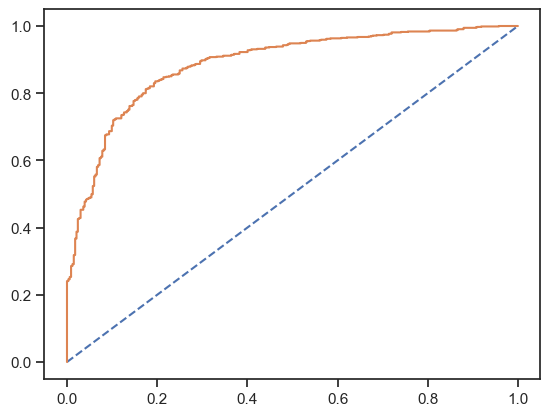

In [130]:
# predict probabilities
probs = best_grid_nbgscv.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.887


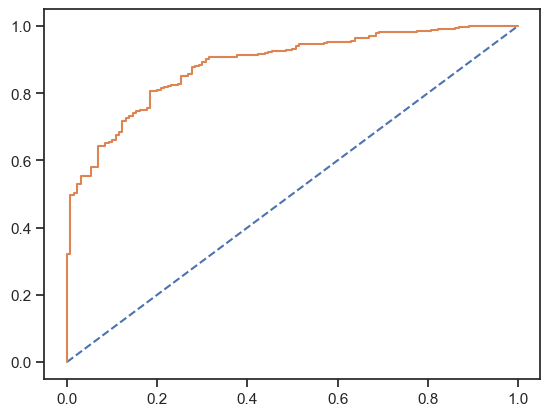

In [131]:
# predict probabilities
probs = best_grid_nbgscv.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 3.2 Gaussian Naive Bayes with SMOTE

In [133]:
sm = SMOTE (random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [134]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

0.8258503401360544
[[600 135]
 [121 614]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.84      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



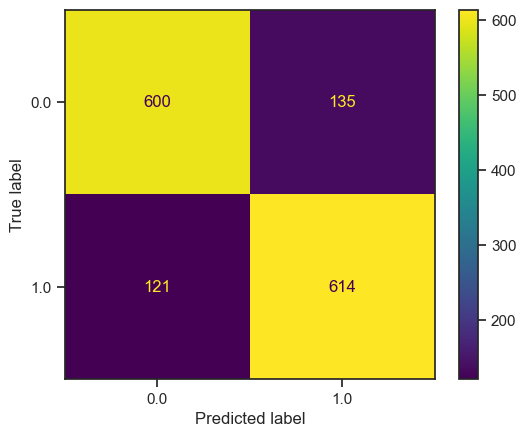

In [135]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res)

print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7947598253275109
[[103  27]
 [ 67 261]]
              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69       130
         1.0       0.91      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.79      0.80       458



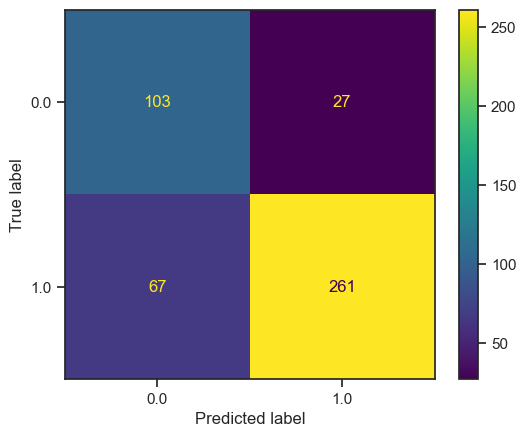

In [136]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
plot_confusion_matrix(NB_SM_model,X_test,y_test)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.897


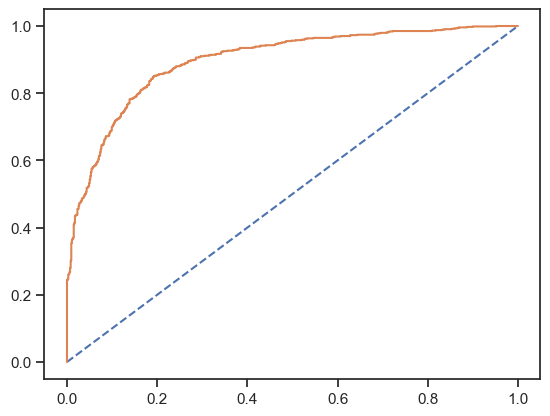

In [137]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.897


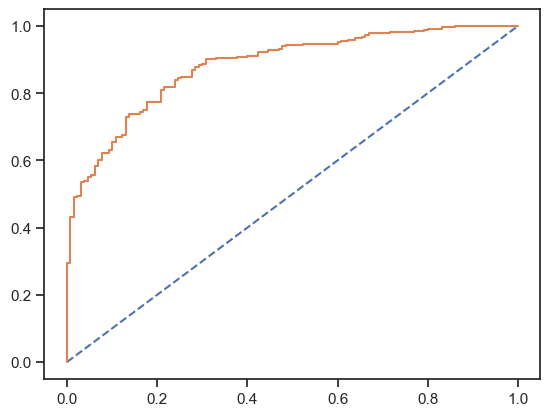

In [138]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 4. KNN Model

In [139]:
df3 = df

In [140]:
# Arrange data into independent variables and dependent variables
X =  df3.drop("vote",axis=1) ## Features
y = df3["vote"]  ## Target

In [141]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]].apply(zscore)

In [142]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [143]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.8641049671977507
[[249  83]
 [ 62 673]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       332
         1.0       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



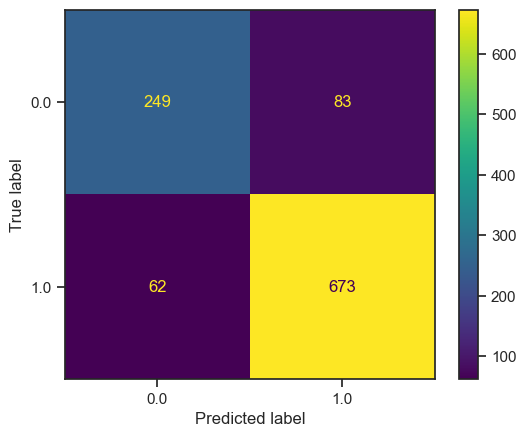

In [144]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(KNN_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8187772925764192
[[ 91  39]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       130
         1.0       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



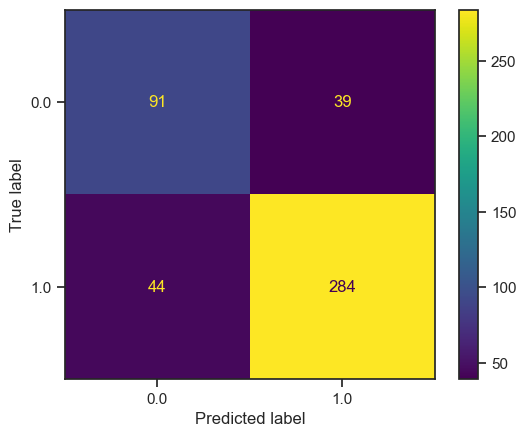

In [145]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)


plot_confusion_matrix(KNN_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [146]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22707423580786024,
 0.1899563318777293,
 0.18122270742358082,
 0.17903930131004364,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17903930131004364,
 0.16593886462882101,
 0.17030567685589515]

# Plot misclassification error vs k (with k value on X-axis) using matplotli

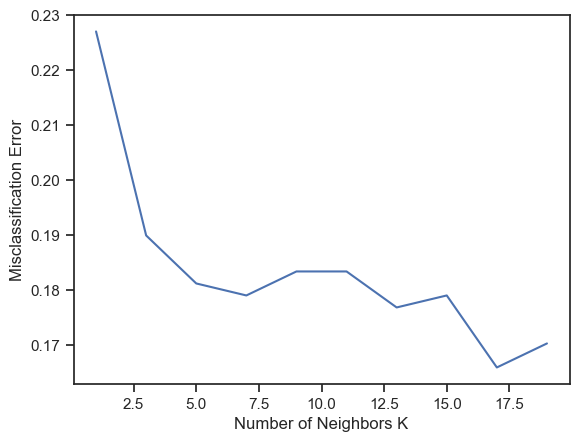

In [147]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [148]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=16)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [149]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8388003748828491
[[240  92]
 [ 80 655]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       332
         1.0       0.88      0.89      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [150]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.834061135371179
[[ 95  35]
 [ 41 287]]
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71       130
         1.0       0.89      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.84       458



# As the difference between train and test accuracies is 00.47 % which is less than 10%(Industry standard). We can select K=16 as the best value for K.

AUC: 0.901


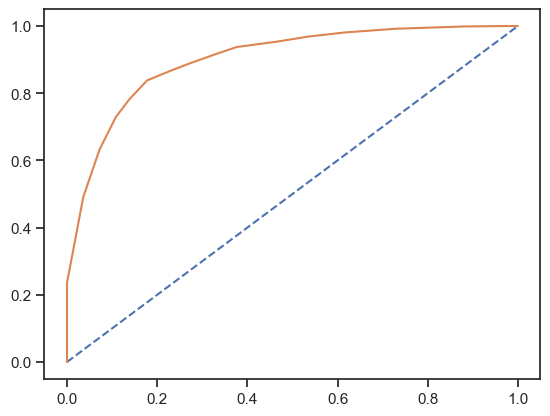

In [151]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.901


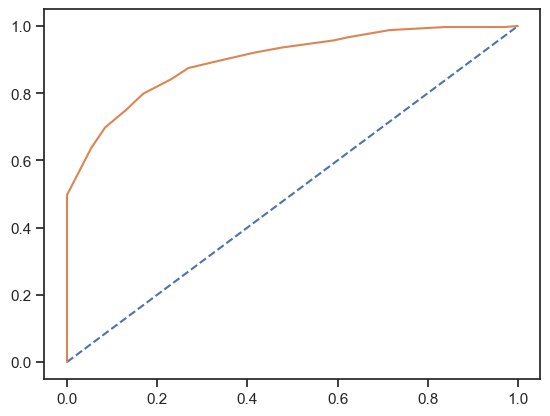

In [152]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 4.1 KNN With GridsearchCV

In [153]:
clf = KNeighborsClassifier()
param = {'leaf_size' : [10,20,30,40],
        'n_neighbors' : [10,20,30,40],
         
        }
KNNmodel = GridSearchCV(clf, param_grid= param, cv = 5)
KNNmodel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [10, 20, 30, 40]})

In [154]:
KNNmodel.best_params_
best_grid = KNNmodel.best_estimator_

In [155]:
ytrain_predictKNN = best_grid.predict(X_train)
ytest_predictKNN = best_grid.predict(X_test)

0.8359887535145267
[[235  97]
 [ 78 657]]
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       332
         1.0       0.87      0.89      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.83      1067



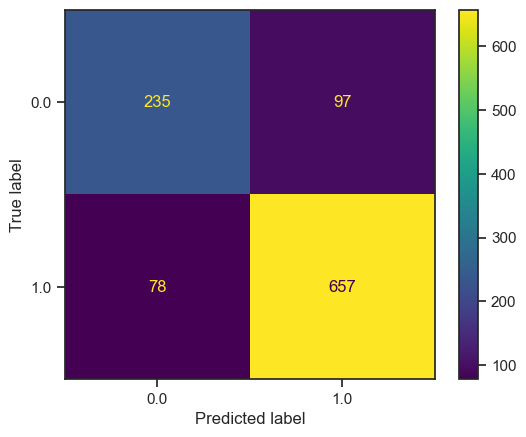

In [156]:
modelscoreknn = best_grid.score(X_train, y_train)
print(modelscoreknn)

plot_confusion_matrix(best_grid,X_train,y_train)
print(metrics.confusion_matrix(y_train, ytrain_predictKNN))
print(metrics.classification_report(y_train, ytrain_predictKNN))

0.8296943231441049
[[ 92  38]
 [ 40 288]]
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70       130
         1.0       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



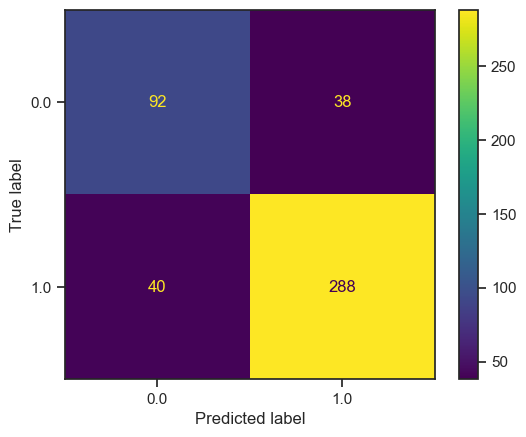

In [157]:
## Performance Matrix on test data set
modelscoreKNNtest = best_grid.score(X_test, y_test)
print(modelscoreKNNtest)

plot_confusion_matrix(best_grid,X_test,y_test)
print(metrics.confusion_matrix(y_test, ytest_predictKNN))
print(metrics.classification_report(y_test, ytest_predictKNN))

AUC: 0.900


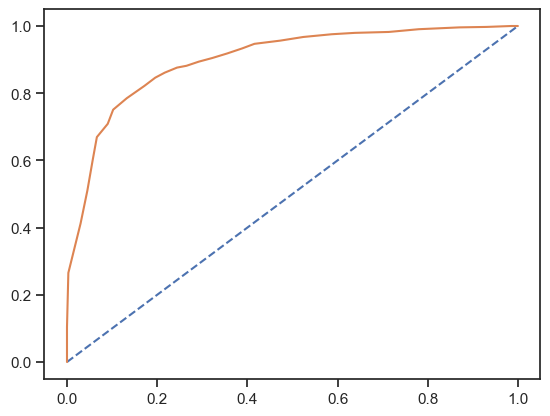

In [158]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.900


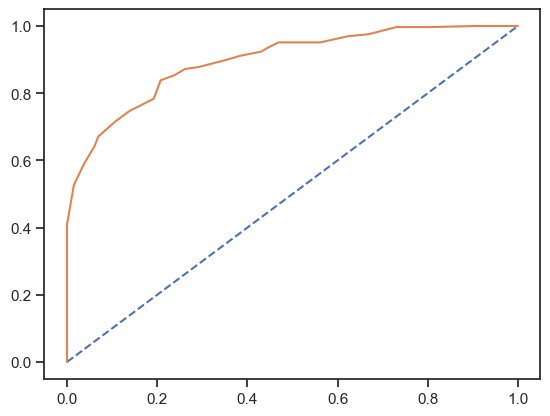

In [159]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 4.2 KNN With SMOTE

In [160]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

0.8836734693877552
[[692  43]
 [128 607]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       735
         1.0       0.93      0.83      0.88       735

    accuracy                           0.88      1470
   macro avg       0.89      0.88      0.88      1470
weighted avg       0.89      0.88      0.88      1470



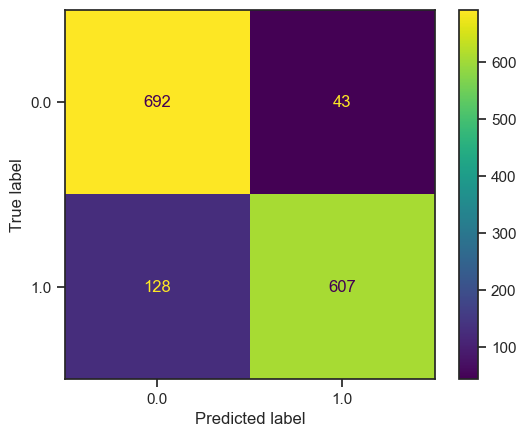

In [161]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)

plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.7838427947598253
[[105  25]
 [ 74 254]]
              precision    recall  f1-score   support

         0.0       0.59      0.81      0.68       130
         1.0       0.91      0.77      0.84       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.78      0.79       458



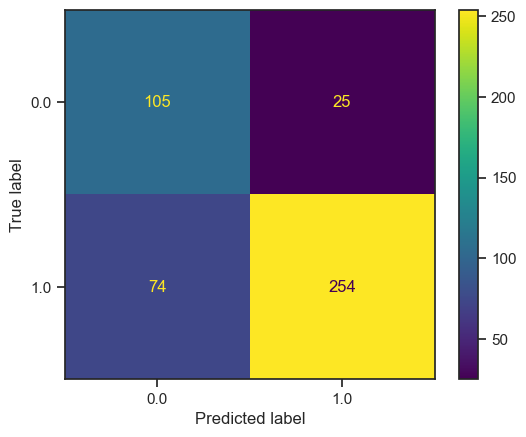

In [162]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(KNN_SM_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.966


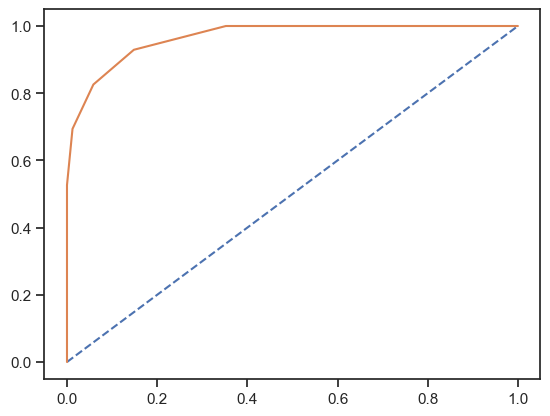

In [163]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.966


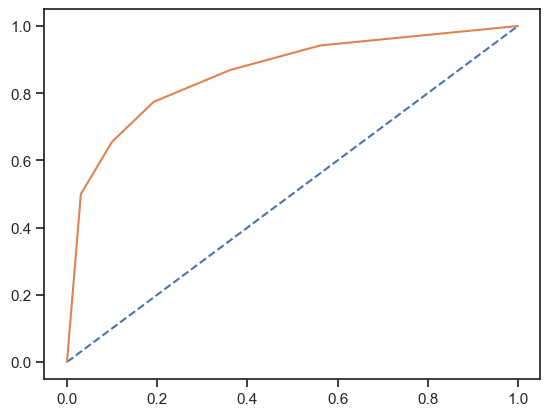

In [164]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 5. Ada Boost

In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.74       332
         1.0       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



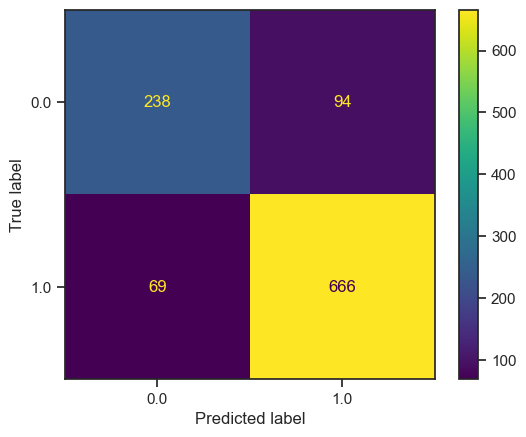

In [166]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
plot_confusion_matrix(ADB_model,X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       130
         1.0       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



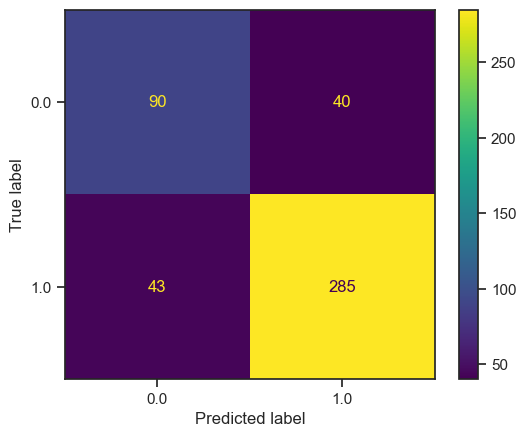

In [167]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
plot_confusion_matrix(ADB_model,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.913


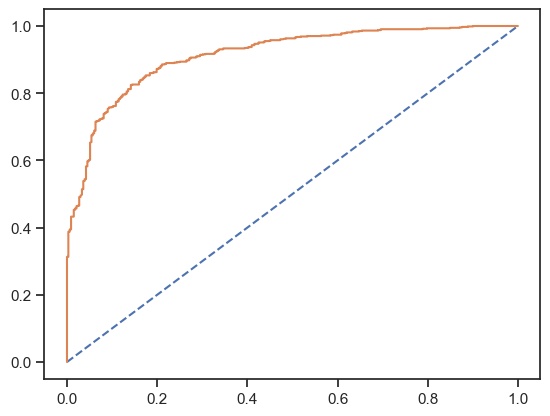

In [168]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.913


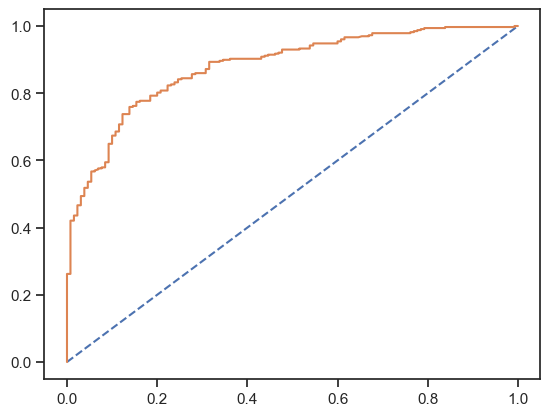

In [169]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 5.1 Ada Boost with SMOTE

In [170]:
from imblearn.over_sampling import SMOTE

In [172]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [173]:
from sklearn.neighbors import KNeighborsClassifier


ADB_modelsm = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_modelsm.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8659863945578231
[[643  92]
 [105 630]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       735
         1.0       0.87      0.86      0.86       735

    accuracy                           0.87      1470
   macro avg       0.87      0.87      0.87      1470
weighted avg       0.87      0.87      0.87      1470



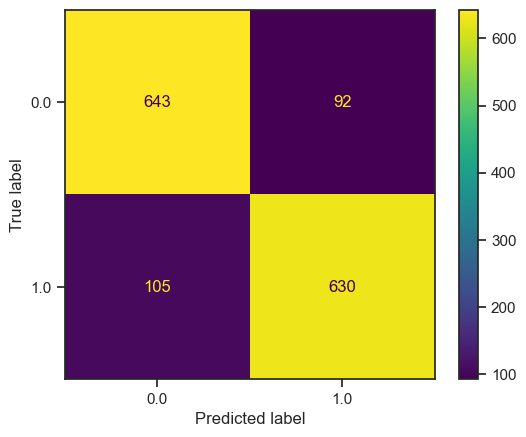

In [174]:
## Performance Matrix on train data set
y_train_predict = ADB_modelsm.predict(X_train_res)
model_score = ADB_modelsm.score(X_train_res, y_train_res)
print(model_score)

plot_confusion_matrix(ADB_modelsm,X_train_res, y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8034934497816594
[[ 98  32]
 [ 58 270]]
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.69       130
         1.0       0.89      0.82      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458



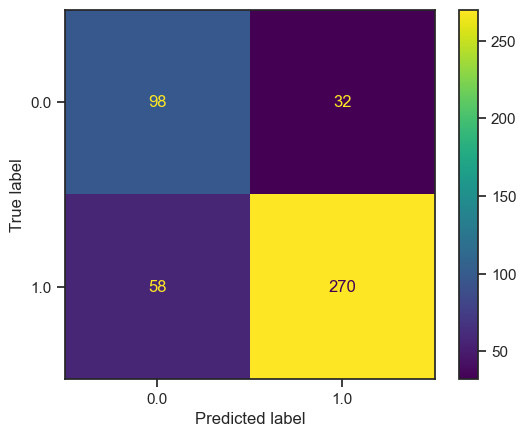

In [175]:
## Performance Matrix on test data set
y_test_predict = ADB_modelsm.predict(X_test)
model_score = ADB_modelsm.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(ADB_modelsm,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.946


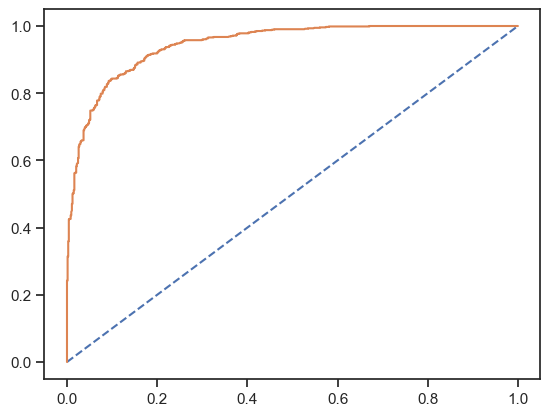

In [176]:
# predict probabilities
probs = ADB_modelsm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.946


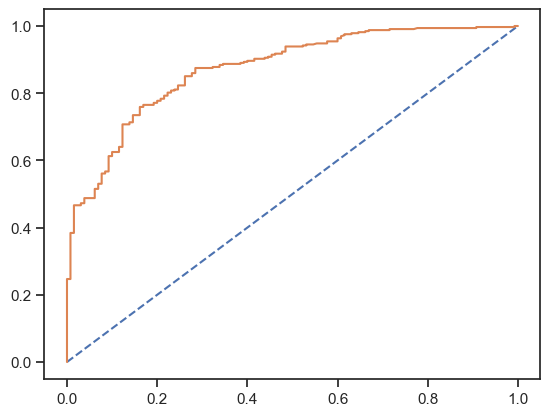

In [177]:
# predict probabilities
probs = ADB_modelsm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 6. Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       332
         1.0       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



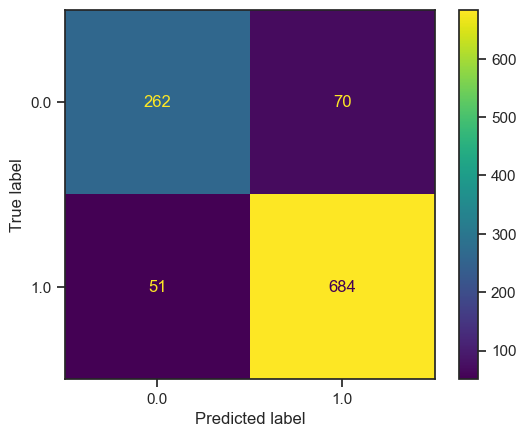

In [179]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
plot_confusion_matrix(gbcl,X_train, y_train)

print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



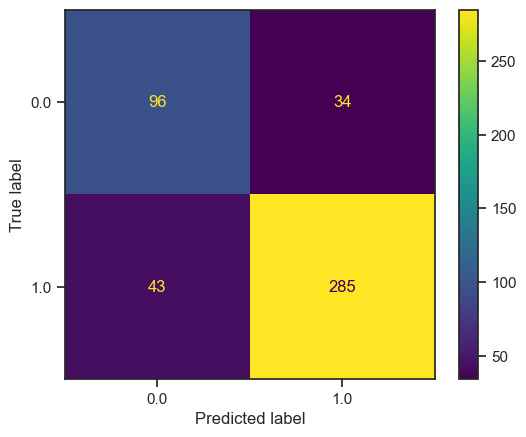

In [180]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(gbcl,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.949


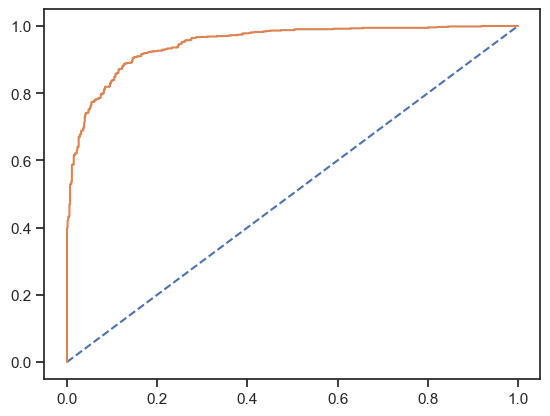

In [181]:
# predict probabilities
probs = gbcl.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.949


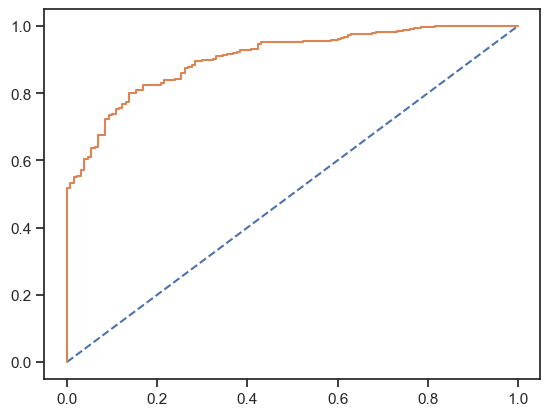

In [182]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 6.1 Gradient Boost with SMOTE

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

0.9020408163265307
[[667  68]
 [ 76 659]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       735
         1.0       0.91      0.90      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



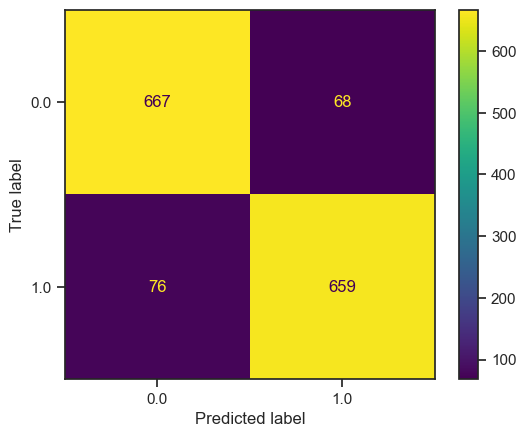

In [184]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)

plot_confusion_matrix(gbcl,X_train_res, y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8056768558951966
[[ 98  32]
 [ 57 271]]
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.69       130
         1.0       0.89      0.83      0.86       328

    accuracy                           0.81       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.81      0.81       458



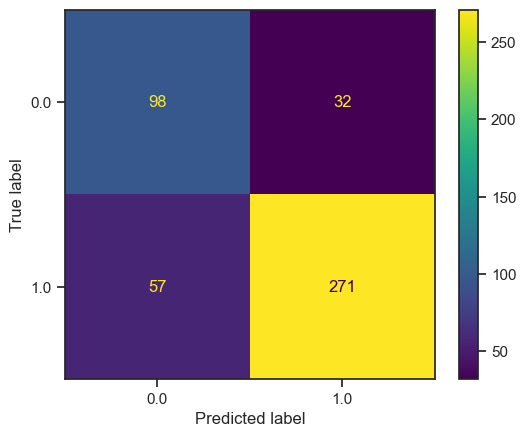

In [185]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(gbcl,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.969


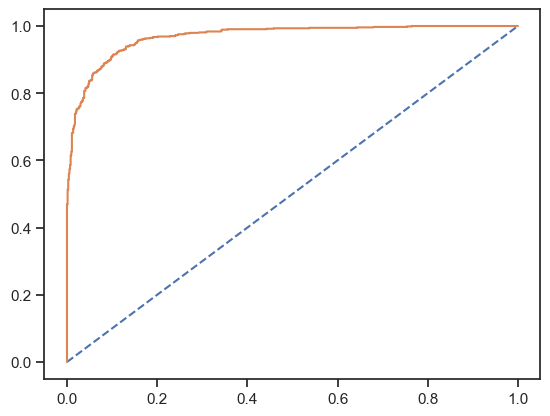

In [186]:
# predict probabilities
probs = gbcl.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.969


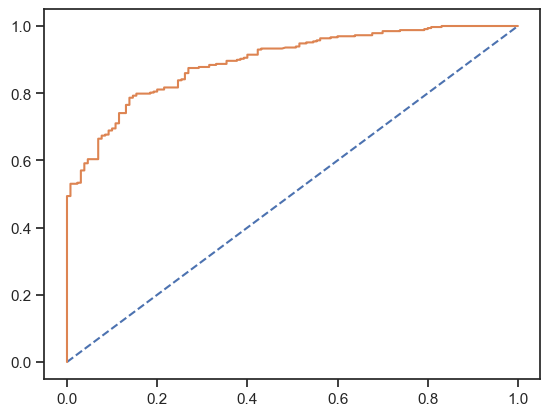

In [187]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 7. Random Forest

In [188]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       332
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



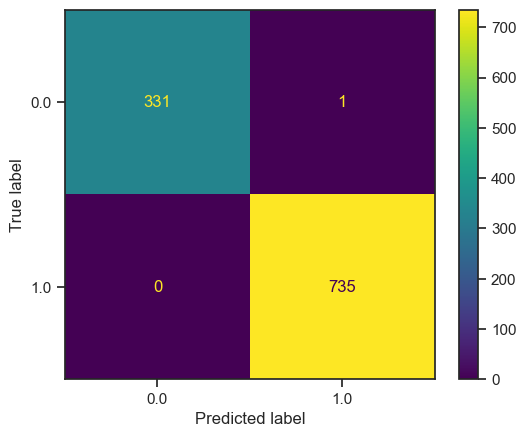

In [189]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(RF_model,X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8187772925764192
[[ 91  39]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       130
         1.0       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



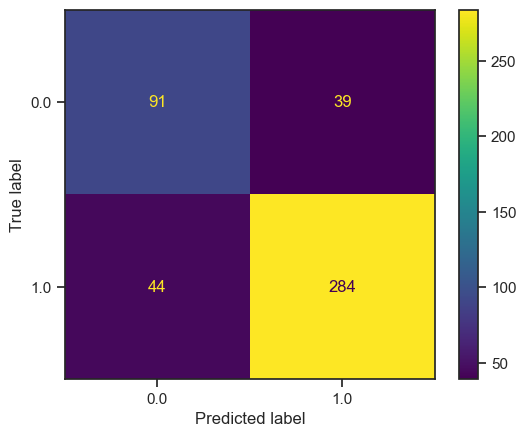

In [190]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(RF_model,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 1.000


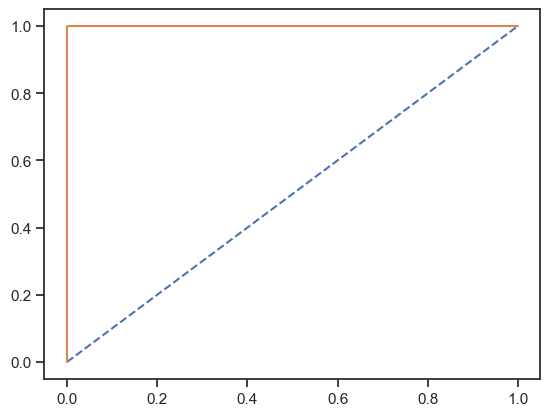

In [191]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


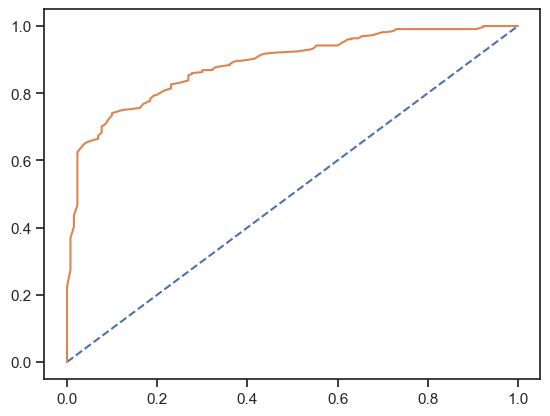

In [192]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 7.1 Random Forest with SMOTE

In [193]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

0.9993197278911564
[[734   1]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



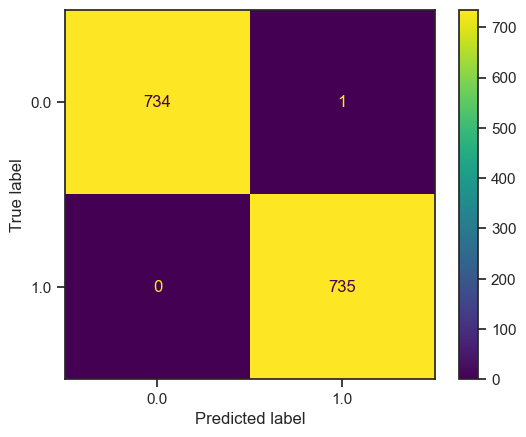

In [194]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_res)
model_score =RF_model.score(X_train_res, y_train_res)
print(model_score)

plot_confusion_matrix(RF_model,X_train_res, y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8187772925764192
[[ 95  35]
 [ 48 280]]
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.70       130
         1.0       0.89      0.85      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



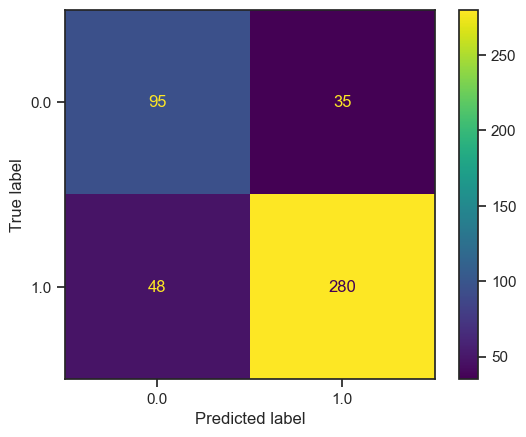

In [195]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(RF_model,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 1.000


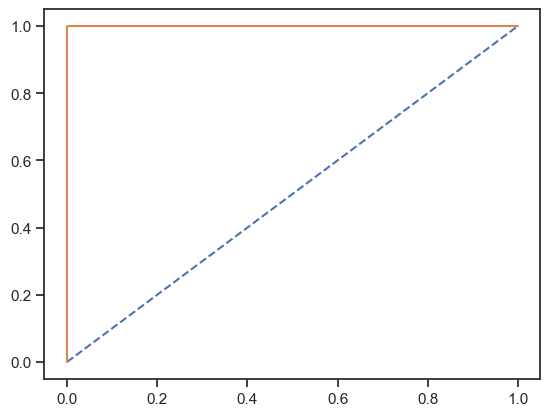

In [196]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


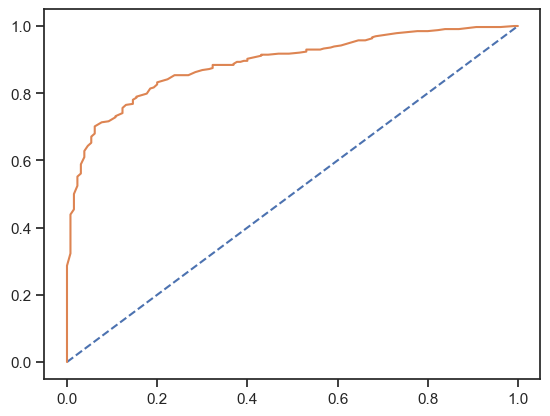

In [197]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 8. Bagging

In [199]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       332
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



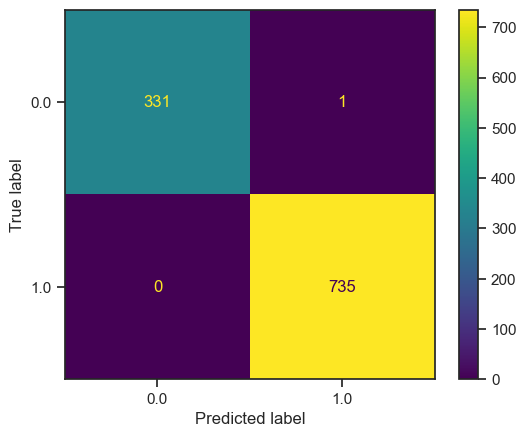

In [200]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(Bagging_model,X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7969432314410481
[[ 84  46]
 [ 47 281]]
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64       130
         1.0       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



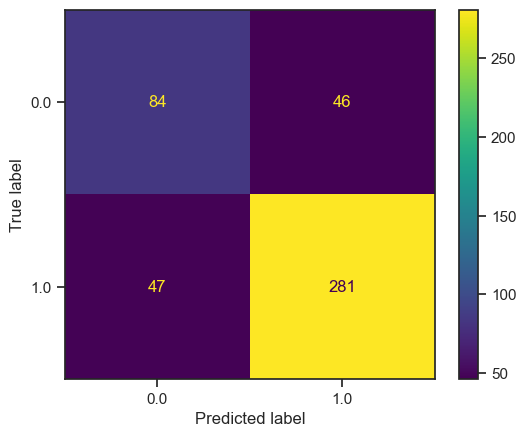

In [201]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(Bagging_model,X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

AUC: 1.000


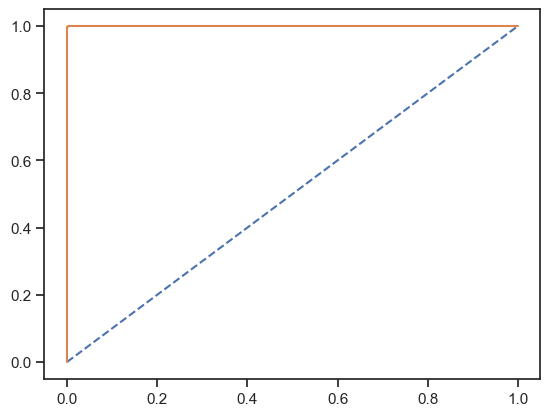

In [202]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


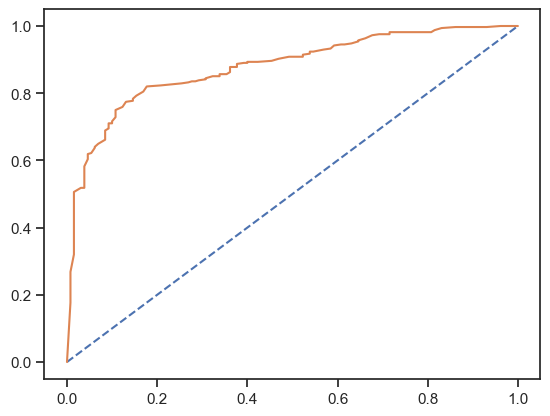

In [203]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# 8.1 Bagging with SMOTE

In [204]:
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [205]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_res)
model_score =Bagging_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9993197278911564
[[734   1]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [206]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[ 87  43]
 [ 49 279]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       130
         1.0       0.87      0.85      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



AUC: 1.000


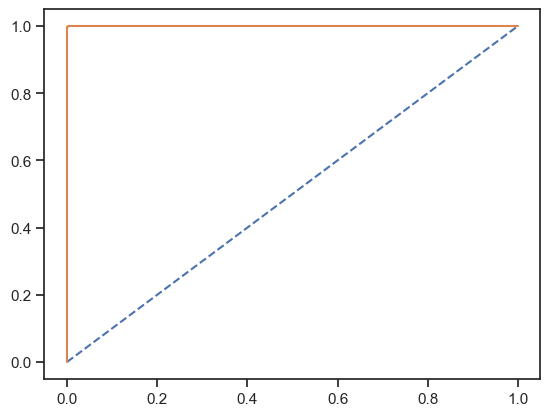

In [207]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


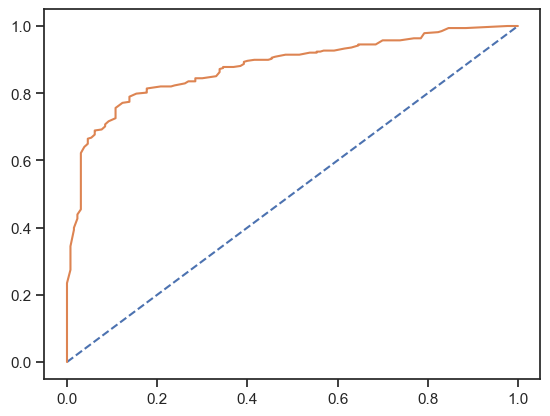

In [208]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# End of Python COde